# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

#### Importing the necessary libraries

In [1]:
# Import libraries for Data reading & manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Import libraries to split data
from sklearn.model_selection import train_test_split


# Import libraries to build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics


# Import libraries to tune different models
from sklearn.model_selection import GridSearchCV

# Import libraries to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Import libraries to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Setting display options
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

#### Importing the necessary dataset

In [2]:
# Read the data and naming it 'learn' (original)
learn = pd.read_csv('ExtraaLearn.csv')

In [3]:
# Creating a copy data to work on to avoid any changes to the original data ('learn')
data = learn.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
# returns the first 5 rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [5]:
# return the last 5 rows
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


#### Observations:

* The DataFrame has 15 columns as mentioned in the Data Dictionary. Data in each row corresponds to the different attributes of leads and their interaction details with ExtraaLearn.

In [6]:
# Checking the shape of the data
data.shape

(4612, 15)

#### Observations:

* In our data, ExtraaLearn, there are 4612 rows, which are leads, and 15 columns.

In [7]:
# Checking the data types of each columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

#### Observations:

* There are 4612 rows and 15 columns in the dataset.
* All the columns have 4612 non-null values, therefore, there are no missing values in the data.


* There are 5 numerical columns. 
    * 4 are interger type (age, website_visits, time_spent_on_website, and status)
    * 1 is a float type (page_views_per_visits)

* There are 10 object columns 
    * ID, current_occupation, first_interaction, profile_completion, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, and referral

In [8]:
# Chceking for missing values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

#### Observations:
* There is no missing values in this dataset, as all columns have a return of 0.

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

#### Observations:
* There are no duplicate values seen in this data.

In [10]:
# Checking the count of unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

#### Observations:
* ID is an identifier which is unique for each lead, therefore, we can drop this column as it would not add any value to our analysis.
* On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [11]:
# Dropping the ID column
data = data.drop(['ID'] , axis = 1)

In [12]:
# Creating a list of all numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

# Creating a list of all categorical columns
cat_col = list(data.select_dtypes('object').columns)

In [13]:
cat_col

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [14]:
num_col

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'status']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Checking the statistical summary of the data**

In [15]:
# Checking the statistical summary for Numerical variables
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


**Observations:**

* The average lead age around 46 years. It has a high range, from 18 to 63. This indicate a good age diversity wihtin the customers.
* Less than 75% of the leads has visited the website 5 times. There are some extreme values, given that the maximum value is 30 times.
* 50% of the leads spent 376 seconds (~ 6 minutes) on the website.
* The average page views per visit is 3 pages with an maximum of 18 pages.
* As the status only takes two ouputs, 0 or 1, depending if the lead is converting or not, the mean tells us that ~30% of the leads converted to paying customers.

In [16]:
# Printing the number of occurences of each unique value in each CATEGORICAL columns
for column in cat_col:
    print(data[column].value_counts(normalize = True))
    print("-" * 10)
    print(data[column].value_counts())
    print("-" * 50)

current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
----------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
----------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
----------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
----------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity

**Observations:**
* 2616 of the leads (~56%) are professionals looking to upskill through ExtraaLearn.
* The first interaction is roughly evenly split between being through the website (~ 55%) and through their mobile app (~ 44%).
* More than 97% of the leads have completed at least 50% of their profile.
* Almost 50% of the last interaction between the lead and ExtaaLearn have been through email.
* More than 88% of the leads have not seen the ad of ExtraaLearn in a Newspaper nor in a Magazine.
* Only 15% of the leads have heard about ExtraaLearn through educational channels such as online forums, discussion threads, or educational websites.
* Most leads (~ 98%) have not heard about ExtraaLearn through a reference.

In [17]:
# Printing the number of occurences of each unique value in each NUMERICAL columns
for column in num_col:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

age
57   0.08348
58   0.08283
56   0.07155
59   0.07112
60   0.05160
55   0.04337
32   0.04076
53   0.01973
24   0.01951
43   0.01930
48   0.01908
51   0.01908
54   0.01908
49   0.01886
21   0.01865
50   0.01843
46   0.01843
23   0.01843
45   0.01821
42   0.01800
19   0.01756
44   0.01756
47   0.01735
52   0.01670
33   0.01648
20   0.01626
34   0.01605
22   0.01539
41   0.01518
18   0.01431
35   0.01431
40   0.01366
37   0.01301
38   0.01258
36   0.01258
39   0.01127
62   0.01041
63   0.01019
30   0.00954
61   0.00824
31   0.00824
29   0.00781
28   0.00585
25   0.00369
26   0.00325
27   0.00304
Name: proportion, dtype: float64
--------------------------------------------------
website_visits
2    0.26648
1    0.16370
3    0.13899
4    0.10711
5    0.09150
6    0.06114
7    0.05030
0    0.03773
8    0.03274
9    0.01691
10   0.00737
11   0.00629
12   0.00542
13   0.00499
14   0.00369
15   0.00195
24   0.00065
16   0.00065
25   0.00043
20   0.00043
30   0.00022
18   0.00022
27   0.00022


**Observations:**
* When adding the number of occurences, we get these percentages:
    * Around 2% of the leads are between 25 and 29 year olds.
    * Around 40% of the leads are between 55 and 60 year olds.
* Only 16% of the leads have visited the website once. And most leads (~ 26%) have visited the website only twice.
* 30% of leads have converted to being a paid customer.

### Univariate Analysis

#### Numerical columns (sauf Status)

In [18]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,         # Number of rows of the subplot grid= 2
        sharex=True,     # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    ) # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    ) # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ) # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

##### **A. Age**

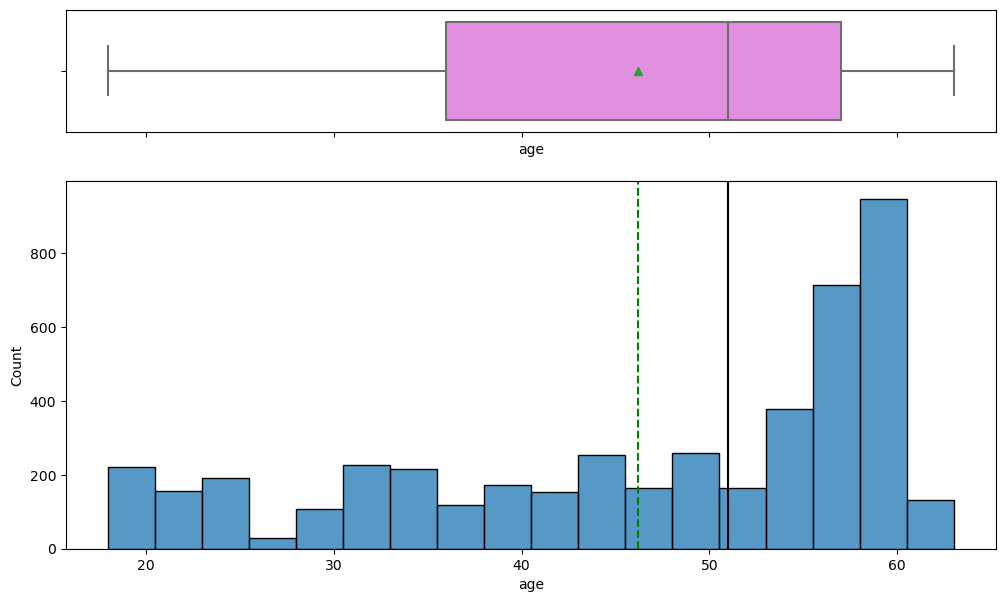

In [19]:
histogram_boxplot(data, 'age')

**Observations:**
* The boxplot shows that 50% of the leads are between 36 and 57 years olds.
* The histogram shows that most leads are between 55 and 61 year olds.
* The average age is around 46 year olds which is less than the median age which seems to be around 51 year olds.
* The minimum age seems to be around 18 year olds and the maximum around 63 year olds.
* In addition, the age distribution is negatively skewed (skewed left).

##### **B. Website visits (website_visits)**

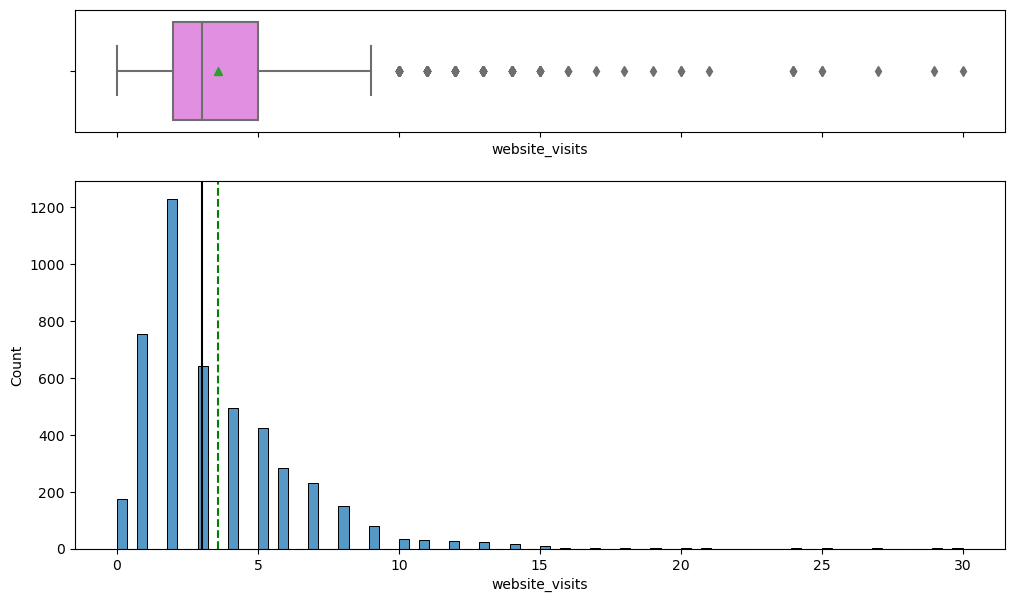

In [20]:
histogram_boxplot(data, 'website_visits')

**Observations:**
* The boxplot shows that this variable has numerious outliers.
* The histogram shows that most leads have visited the website twice.
* The boxplot show that 50% of the leads have visited the website between 2 to 5 times.
* The median (3) is slighly lower the the average (~ 3.5).
* Almost 200 leads have not visited the wesite. And a few leads have been on it 30 times.
* In addition, this distribution is positively skewed (skewed right).

In [21]:
# Checking the number of leads that have never visited the website.
data[data["website_visits"] == 0].shape

(174, 14)

**Observation:**
* 174 leads have never visited the website.

##### **C. Number of time spent on the website (time_spent_on_website)**

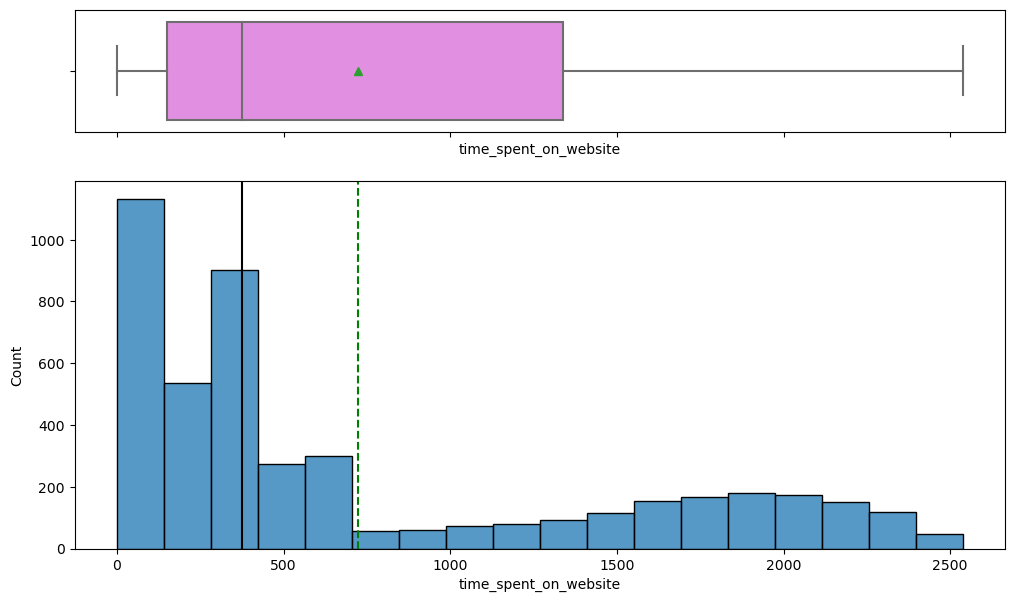

In [22]:
histogram_boxplot(data, 'time_spent_on_website')

**Observations:**
* The boxplot shows that 50% of the leads spend around 150 to 1350 secounds (2.5 to 22.5 minutes) on the website.
* The histogram shows that count number of leads spending less than 150 secounds on the website is the highest with around 1200 leads.
* The median seems to be around 375 seconds and the average around 700 seconds.
* In addition, this distribution is positively skewed (skewed right).

##### **D. Number of pages viewed per visits (page_views_per_visit)**

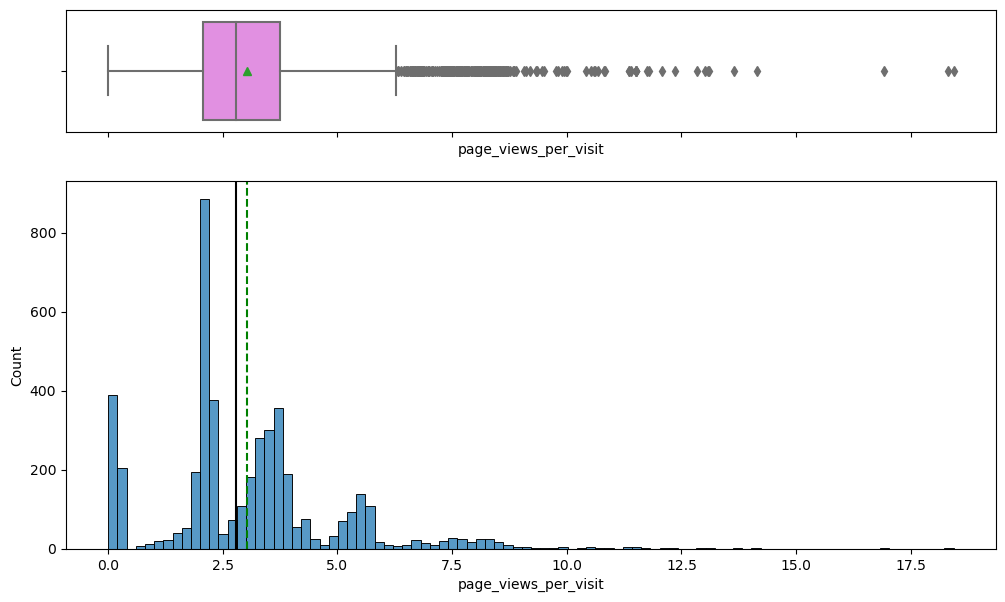

In [23]:
histogram_boxplot(data, 'page_views_per_visit')

**Observations:**
* The boxplot shows that this variable has numerious outliers.
* The histogram shows that most leads have views around 2 pages per visits.
* The boxplot show that 50% of the leads have viewed between 2 and 3.75 pages.
* The median (~ 2.8) is slighly lower the the average (~ 3).
* In addition, this distribution seems to be a symmetrical distribution when excluding the outliers.

#### Categorical columns + Status

In [24]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=60, fontsize=9)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##### **A. Current Occupation (current_occupation)**

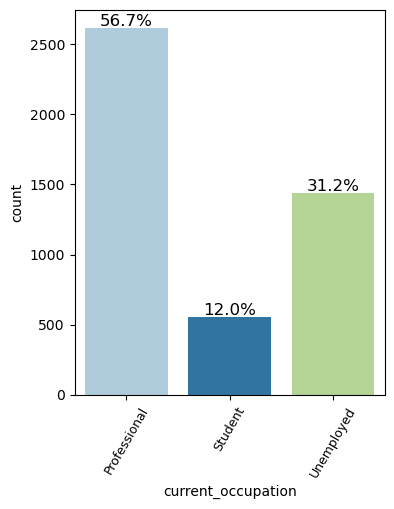

In [25]:
labeled_barplot(data, "current_occupation", perc=True)

**Observations:**
* 56.7% of the leads are professionals which represent around 2600 leads.
* 31.2% are unemployed which is almost 1500 leads.
* 12% are students which is just above 500 leads.

##### **B. Number of first interaction (first_interaction)**

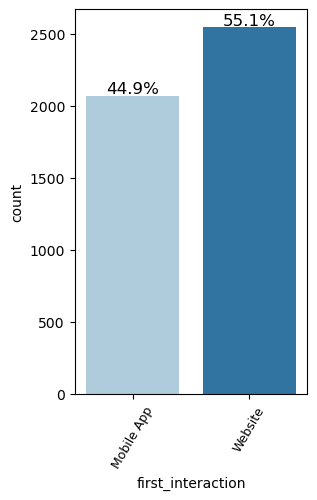

In [26]:
labeled_barplot(data, "first_interaction", perc=True)

**Observations:**
* The first interaction is roughly evenly split between being through the website (~ 55%) and through their mobile app (~ 44%).
* It seems that ~500 leads is the difference between the counts of the two different first interaction methods.

##### **C. Completed Profile (profile_completed)**

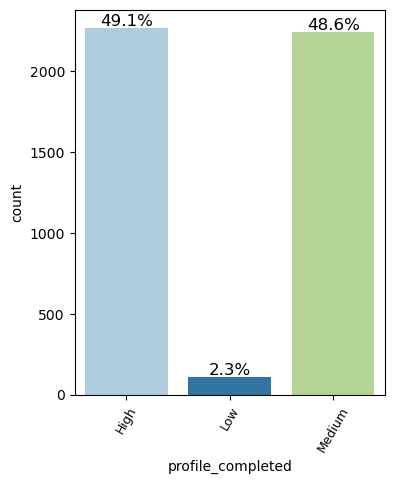

In [27]:
labeled_barplot(data, "profile_completed", perc=True)

**Observations:**
* 97.7% of the leads have at least completed 50% of their profile with 49.1% have completed more than 75%.
* Only 2.3%, which is around 100 leads, have completed less than 50% of their profile.

##### **D. Last interaction between the lead and ExtraaLearn (last_activity)**

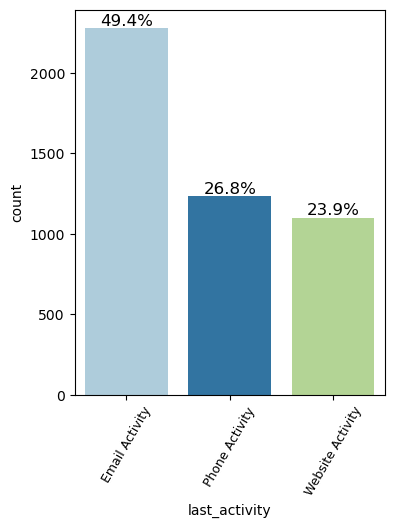

In [28]:
labeled_barplot(data, "last_activity", perc=True)

**Observations:**
* Almost 50% of the leads had their last interaction with ExtraaLearn through email, where information of the program was shared.
* 26.8% had their last interaction over the phone talking to a representative.
* 23.9% had their last interaction on the website (update profile, live chat, etc.)
* It seems that most leads prefer for their interaction to be through email.

##### **E. Ad seen in Newspaper (print_media_type1)**

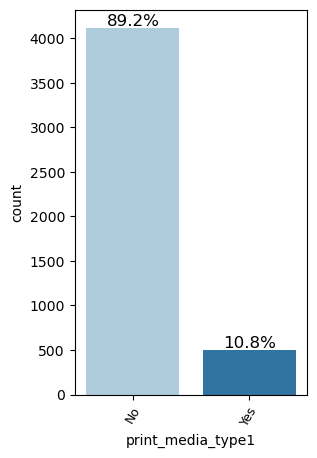

In [29]:
labeled_barplot(data, "print_media_type1", perc=True)

**Observations:**
* Around 500 leads (10.8%) have seen an ExtraaLearn ad in the newspaper.
* This seems to ba a poor percentage when ads are supposed to be seen to attract to customers.

##### **F. Ad seen in Magazine (print_media_type2)**

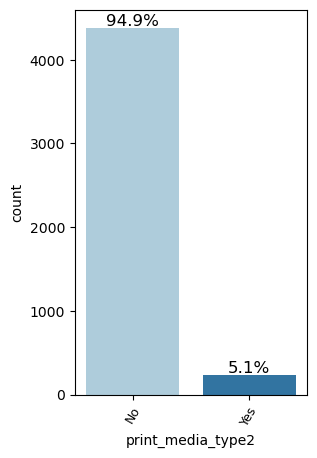

In [30]:
labeled_barplot(data, "print_media_type2", perc=True)

**Observations:**
* Around 200 leads (5.1%) have seen an ExtraLearn as in a magazine.
* This also seems to be a poor percentage.

##### **G. Ad seen on Digital platforms (digital_media)**

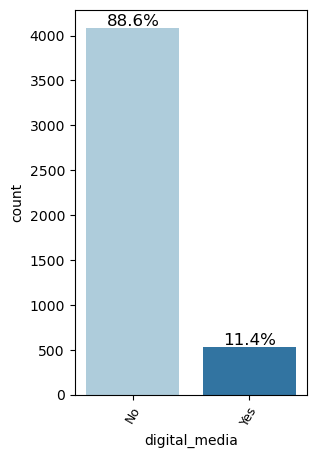

In [31]:
labeled_barplot(data, "digital_media", perc=True)

**Observations:**
* Slightly more than 500 leads (11.4%) have seen an ExtraLearn ad on a digital platform.
* This also seems to be a poor percentage as nowdays, digital platform are heavely used.

##### **H. Seen on Educational channels (educational_channels)**

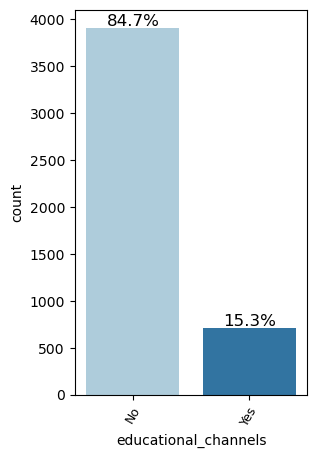

In [32]:
labeled_barplot(data, "educational_channels", perc=True)

**Observations:**
* Around 750 leads (15.3%) have heard about ExtraaLearn through education channels.
* It seems that this is a low percentage as ExtraaLearn is an educational program.

##### **I. Reference (referral)**

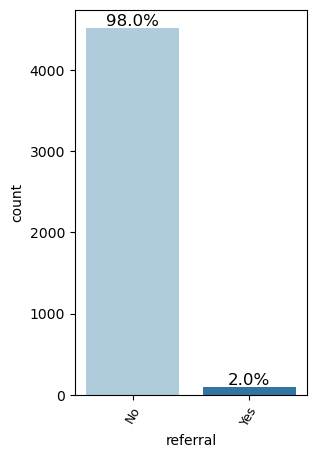

In [33]:
labeled_barplot(data, "referral", perc=True)

**Observations:**
* Less than 100 leads (2%) have been referred to ExtraaLearn.
* However, this number could be explained by the fact that ExtraaLearn is still in an initial stage of their startup. And they haven't had many leads taking the course, yet.

##### **J. Paid customer or not (status)**

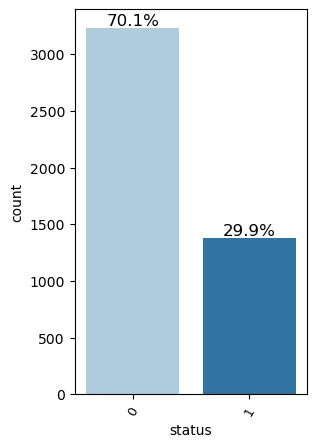

In [34]:
labeled_barplot(data, "status", perc=True)

**Observations:**
* Less than 1500 leads (29.9%) have become a paying customer.
* This seems like a low percentage when we compare it to the percentage of profiles (97.7%) that have more than 50% of it completed .

### Bivariate Analysis

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [36]:
# Function to plot stacked bar plots and bar graph plots

def plot_stacked_and_count(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """  
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    plt.figure(figsize=(6,1))
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True)

    # Adding labels and legend
    plt.xlabel(predictor, fontsize=11)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Stacked Bar Plot: {predictor} vs {target}')
    plt.xticks(rotation=45, fontsize=9)
    plt.show()

    print("-" * 120)
    
    # Count plot using seaborn
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=predictor, hue=target)

    # Adding labels and legend
    plt.xlabel(predictor, fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.xticks(fontsize=9)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Count Plot: {predictor} vs {target}')
    plt.show()

##### **A. Current Occupation vs Status**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

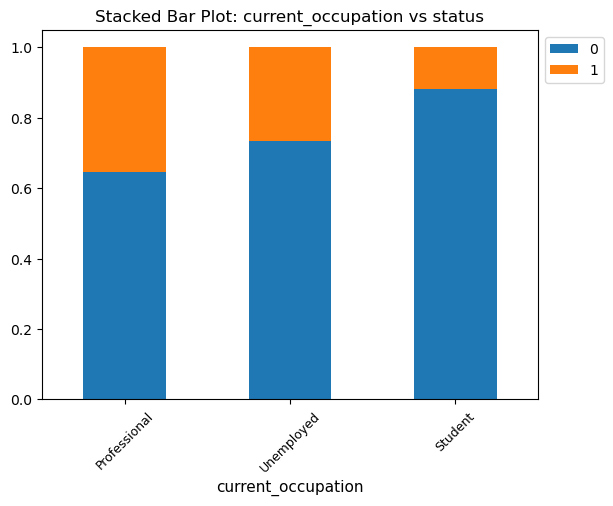

------------------------------------------------------------------------------------------------------------------------


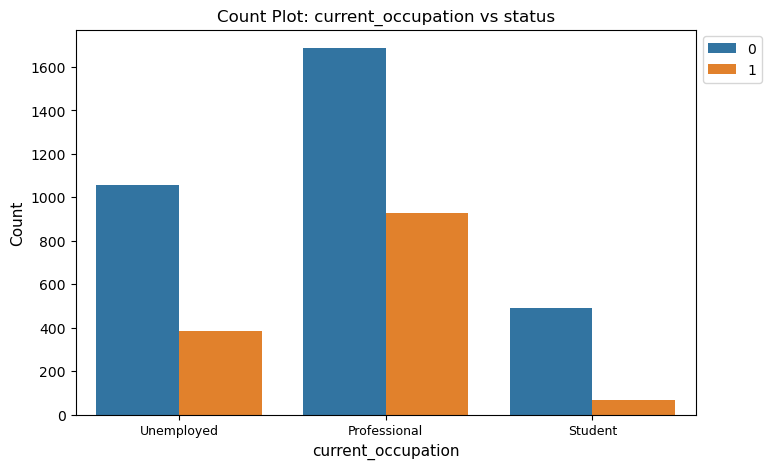

In [37]:
# Relationship between Current Occupation and Status
plot_stacked_and_count(data, 'current_occupation', 'status')

**Observations:**
* The plots shows that Students are the least likely to become paid customers. Only 65 out of 555 students become paid customers which represent ~11%.
* Professional are the most likely to be converted and take a course offered by ExtraaLearn. 929 out of 2616 become paid customers which represent ~35%.
* We can also notice that it seems that the targeted leads are unemployed and professionals. This could means that the offered programs are more oriented to personnels in those two conditions. 
* The programs seem to focuse on skills that are in high demand making it more suitable for currently unemployed or working professionals wanting to transition to a new role or take up more responsibility in their current role.

##### **B. Current Occupation vs Age**

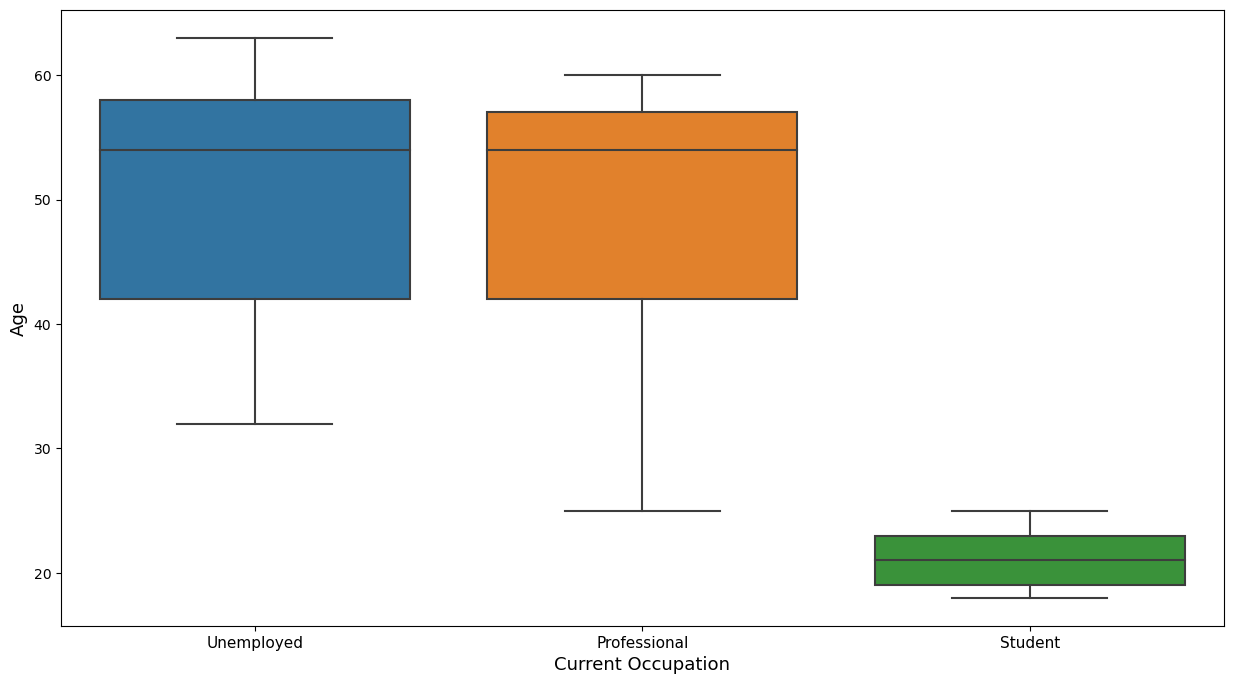

In [38]:
# Relationship between Current Occupation and Age
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='current_occupation', y='age')
plt.xlabel('Current Occupation', size=13)
plt.ylabel('Age', size=13)
plt.xticks(fontsize=11)
plt.show()

In [39]:
# Checking the statistical summary for Current occupation with the age
data.groupby(['current_occupation'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**Observations:**
* The students are the youngest leads with an age range between 18 and 25 years old
* The professional range is 25 to 60 year olds.
* The unemployed range is 32 to 63 year olds.
* The professional and unemployed have the same median at 54 year olds. They also have a very similiar 1st and 3rd quartile with only the 3rd quartile differing of only 1 year old gap.

##### **C. First interaction vs Status**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

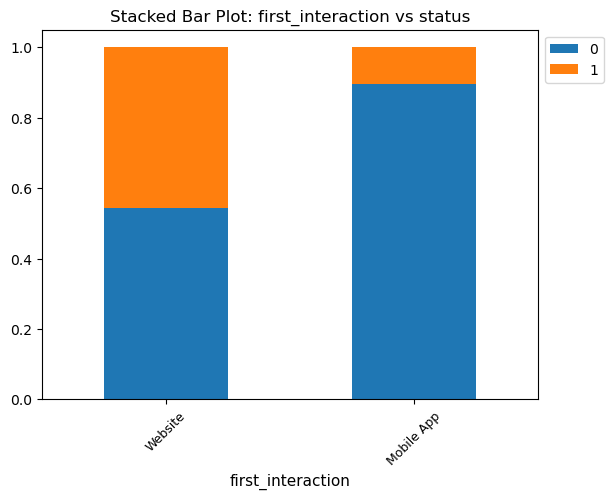

------------------------------------------------------------------------------------------------------------------------


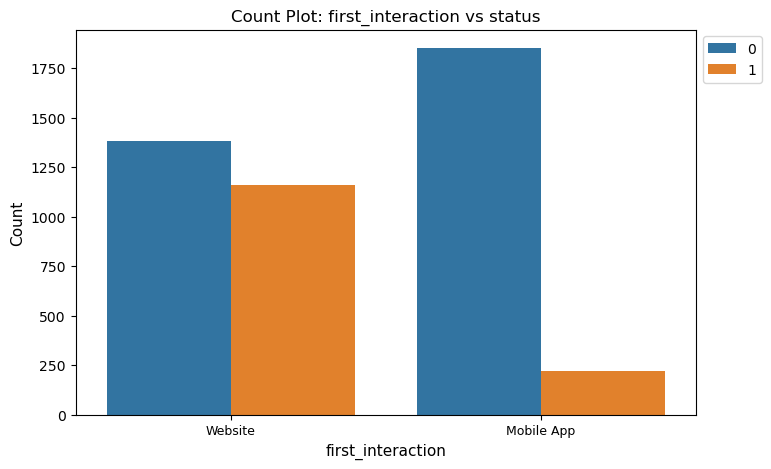

In [40]:
# Relationship between First interaction and Status
plot_stacked_and_count(data, 'first_interaction', 'status')

**Observations:**
* Majority of the leads having their first interaction through the website have been converted to paid customers (1159 out of 2546 leads which represent ~45.6%).
* But on the mobile app, only a very small percentage (~10.5% which is 218 out of 2070) have converted to paid customers.
* One explication could be that the website is more attractive than the mobile app as the lead interaction on the website have a bigger conversion rate.

##### **D. Time spent on the website vs Status**

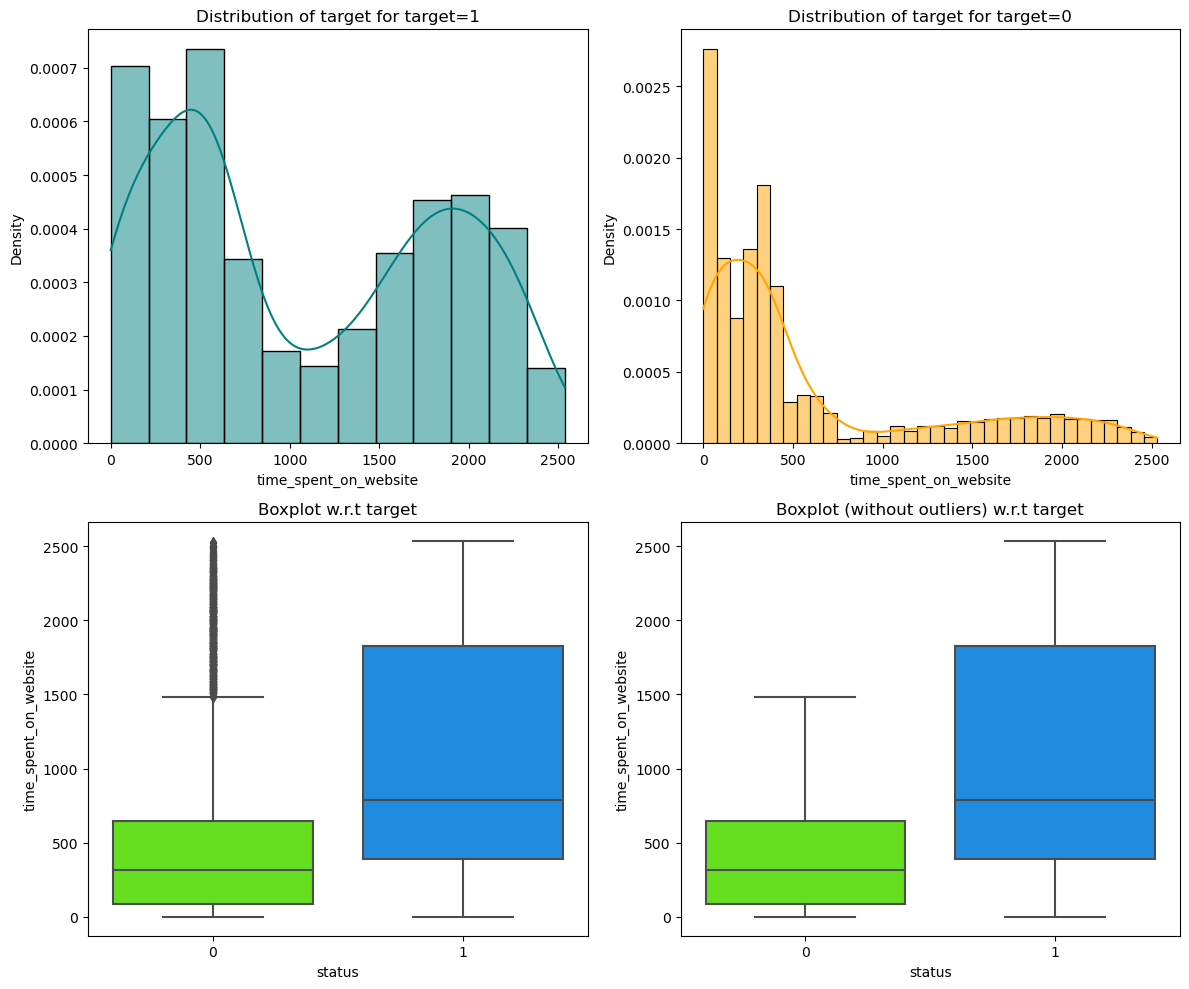

In [41]:
# Relationship between Current Occupation and Status
distribution_plot_wrt_target(data, 'time_spent_on_website', 'status')

In [42]:
# Checking the statistical summary
data.groupby(['status'])['time_spent_on_website'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.00000,577.42071,676.34048,0.00000,88.00000,317.00000,646.00000,2531.00000
1,1377.00000,1068.39797,780.85664,0.00000,390.00000,789.00000,1829.00000,2537.00000


**Observations:**
* The more time a lead spent on the website the chances of being converted to a paid customer is higher.
* The median of paid customer is slightly above the 3rd quartile of the non-converted leads.
* There are some leads that spent more than average time on the website but did not convert to paid customers. Those leads are observed by the outliers.
* Both distributions are positively skewed (skewed right) but the non-converted leads is more positively skewed.
* **Could the small amout of time spent on the website be related to the leads being refered?**

##### **E. Time spent on the website vs Status for the refered leads**

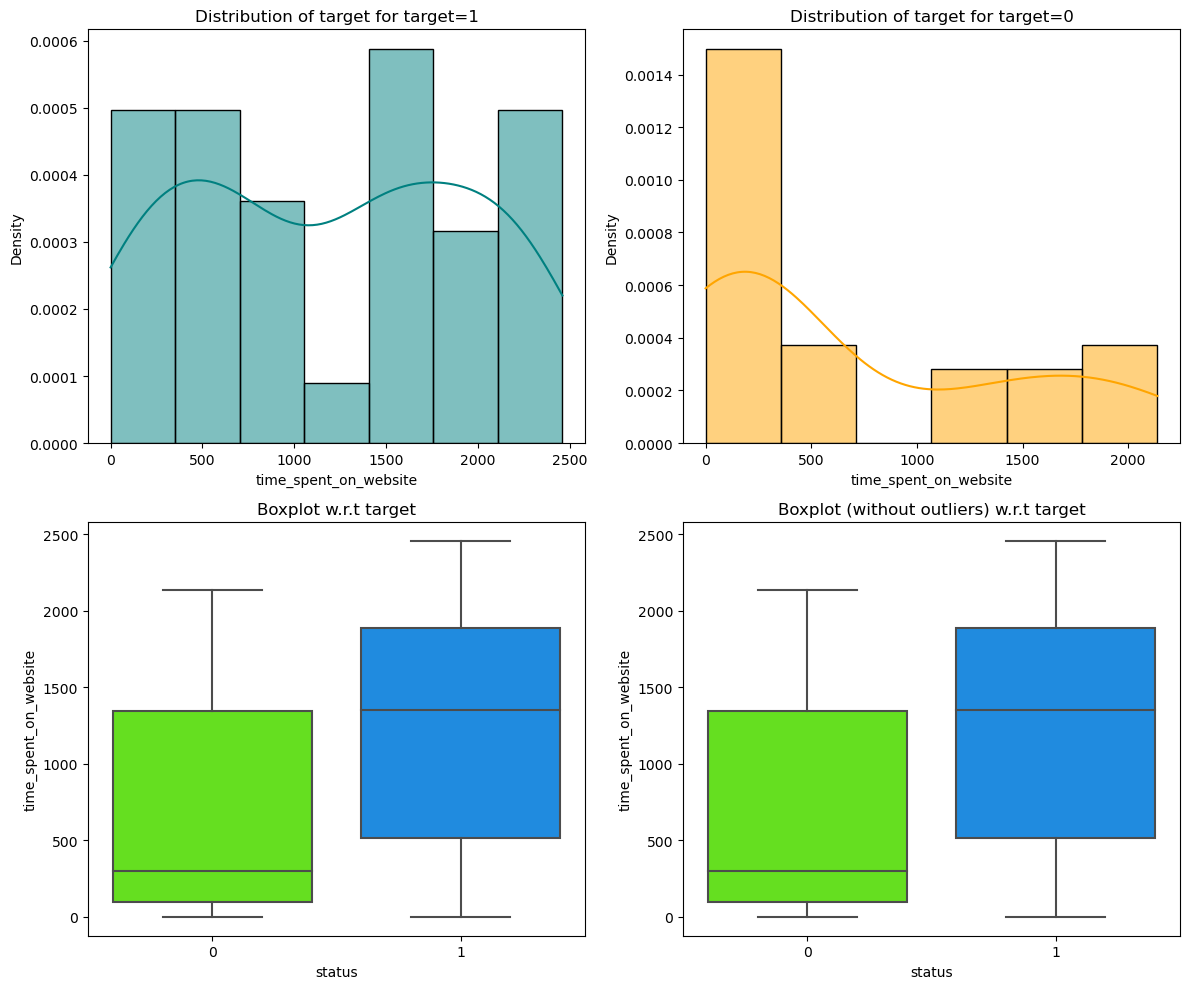

In [43]:
# Filtering the leads being refered into a new dataset
referral_time_spent_website = data[data['referral'] == 'Yes']

# Ploting the relationship between the time spent by the refered leads on the website vs status
distribution_plot_wrt_target(referral_time_spent_website, 'time_spent_on_website', 'status')

In [44]:
# Checking the statistical summary
referral_time_spent_website.groupby(['status'])['time_spent_on_website'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,30.00000,684.03333,744.40374,0.00000,94.25000,297.00000,1344.00000,2138.00000
1,63.00000,1190.06349,776.32727,0.00000,515.50000,1351.00000,1887.50000,2459.00000


**Observations:**
* The histogram still shows high densities for the time spent on the website.
* The box plots also show that the refered leads that have converted have a high median of 1351 seconds spent on the website which is actually higher on then the median of 789 seconds seen in the box plot of time spent on website vs status of every lead.
* The mean is slighly high by ~120 seconds.
* So it seems that the refered leads do not influence the small amount of time spent on the website.

##### **F. Time spent on the website  vs Status for the non refered leads**

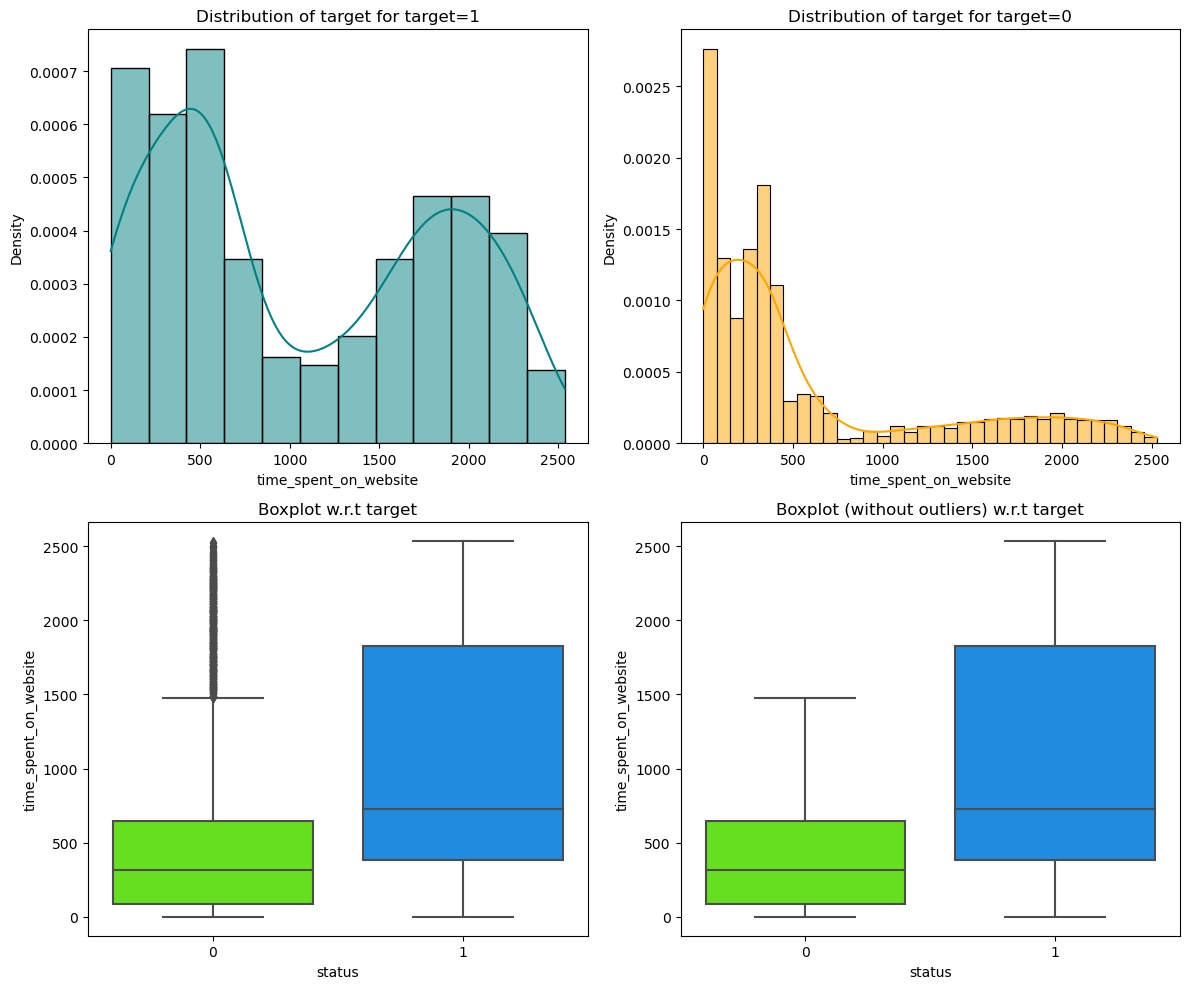

In [45]:
# Filtering the leads who have NOT been refered into a new dataset
no_referral_time_spent_website = data[data['referral'] == 'No']

# Ploting the relationship between the time spent by the refered leads on the website vs status
distribution_plot_wrt_target(no_referral_time_spent_website, 'time_spent_on_website', 'status')

In [46]:
# Checking the statistical summary
no_referral_time_spent_website.groupby(['status'])['time_spent_on_website'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3205.00000,576.42278,675.71928,0.00000,88.00000,317.00000,645.00000,2531.00000
1,1314.00000,1062.56469,780.89066,0.00000,387.00000,729.00000,1827.75000,2537.00000


**Observations:**
* The 4 plots seem to follow the same distribution as the ones showing time spent on website vs status of every lead .
* The statistical summary shows that the non refered leads actually spend less time on the website than the ones refered. A non refered lead spend on average l27 seconds less than a refered lead.
* The median of non refered leads is 729 seconds compared to 1351 seconds of refered leads.
* **Refered leads actually seems to spend more time on the website than the non refered leads.**

##### **G. Time spent on the website  vs Current Occupation**

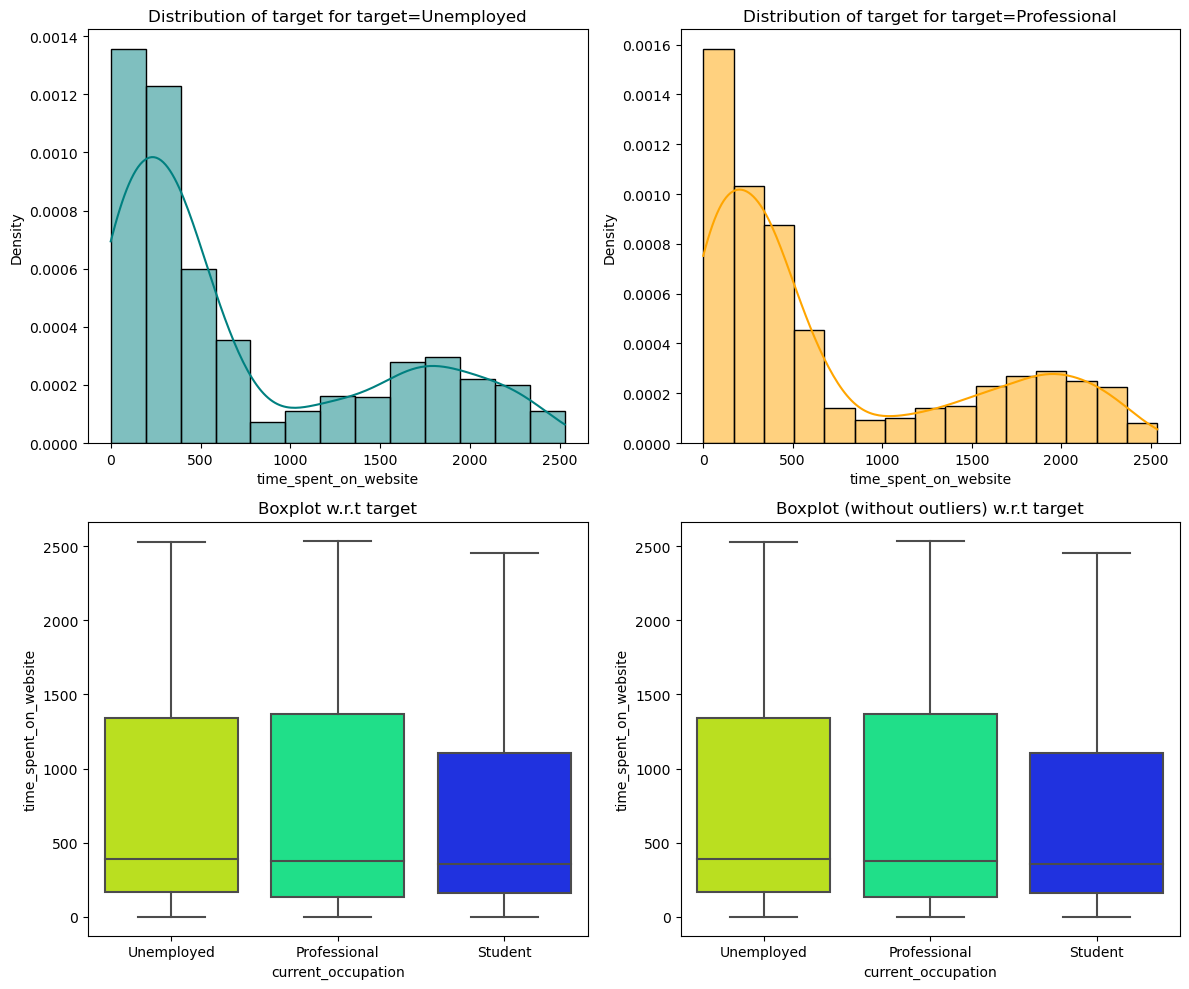

In [47]:
# Relationship between the time spent on the website and their current occupation
distribution_plot_wrt_target(data, 'time_spent_on_website', 'current_occupation')

In [48]:
# Checking the statistical summary
data.groupby(['current_occupation'])['time_spent_on_website'].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,730.79281,751.60641,0.00000,133.50000,378.00000,1366.00000,2537.00000
Student,555.00000,675.65586,722.34812,0.00000,157.50000,354.00000,1105.50000,2457.00000
Unemployed,1441.00000,730.32408,737.57696,0.00000,168.00000,389.00000,1339.00000,2529.00000


**Observations:**
* The box plots between the unemployed and professional leads are very similar.
* The maximum time spent on the website for the three occupation very a slightly (2457 to 2537 seconds).
* The median is also close:
    * It varies by 9 seconds between the professional and unemployed leads, with the unemployed being higher at 389 seconds.
    * It varies by 33 seconds between the unemployed and students leads.
    * The student median is the lowest at 354 seconds.
* The mean is between the professional and unemployed is practically the same at 730 seconds. It only varies in milliseconds.
* However the student means is lower at ~676 seconds.
* Whether the leads occupation, it seems that it doesn't influence their time spent on the website.

##### **H. Number of website visits vs Status**

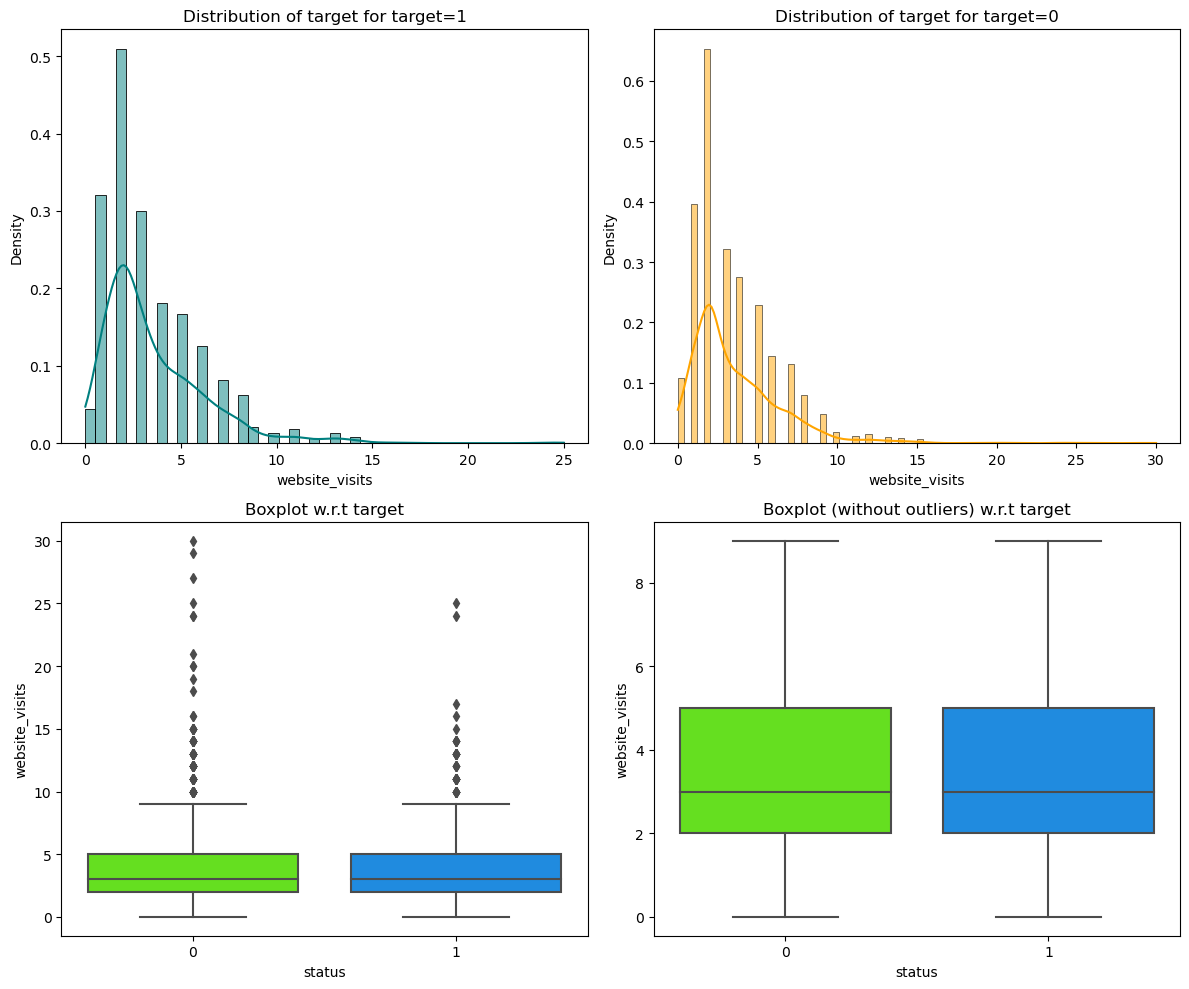

In [49]:
# Relationship between the Number of website visits and Status
distribution_plot_wrt_target(data, 'website_visits', 'status')

In [50]:
# Checking the statistical summary
data.groupby(['status'])['website_visits'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.00000,3.57898,2.87422,0.00000,2.00000,3.00000,5.00000,30.00000
1,1377.00000,3.53813,2.72108,0.00000,2.00000,3.00000,5.00000,25.00000


**Observations:**
* Both Status have outliers with a higher maximum of 30 for leads that do not convert to paid customers compared to 25.
* When looking at the boxplot without outliers, both status distribution are identical. The median shows that leads would visit the website 3 times.
* Both distribution are slightly positively skewed (skewed right).

##### **I. Number of page viewed per visit vs Status**

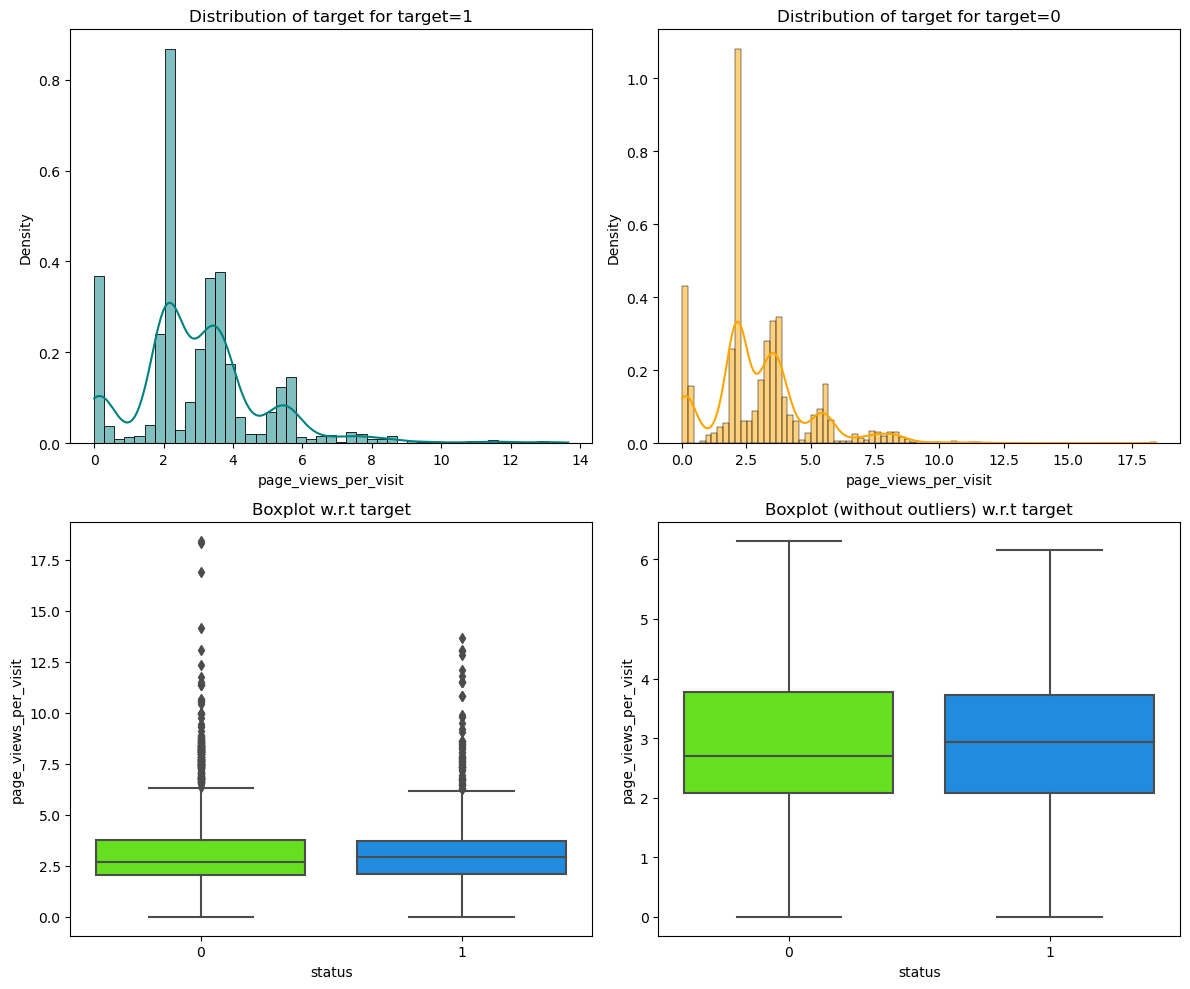

In [51]:
# Relationship between the Number of page viewed per visits and Status
distribution_plot_wrt_target(data, 'page_views_per_visit', 'status')

In [52]:
# Checking the statistical summary
data.groupby(['status'])['page_views_per_visit'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.00000,3.02573,1.99796,0.00000,2.07450,2.70600,3.77350,18.43400
1,1377.00000,3.02705,1.89689,0.00000,2.08300,2.93500,3.73000,13.65600


**Observations:**
* Both Status have outliers with a higher maximum of around 18 pages for leads that do not convert to paid customers compared to around 13 pages.
* When looking at the boxplot without outliers, both status distribution seems almost identical. 
    * The 1st quartile for both is around 2 pages and it differe of only 0.01 between them.
    * The median is is slightly higher for the leads that converted as they visited 2.9 pages compared to the 2.7 pages of the other leads.
    * The 3rd quartile for both is roughly the same with 3.7 pages viewed.
* Both distribution are slightly positively skewed (skewed right).

##### **J. Completed Profile vs Status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

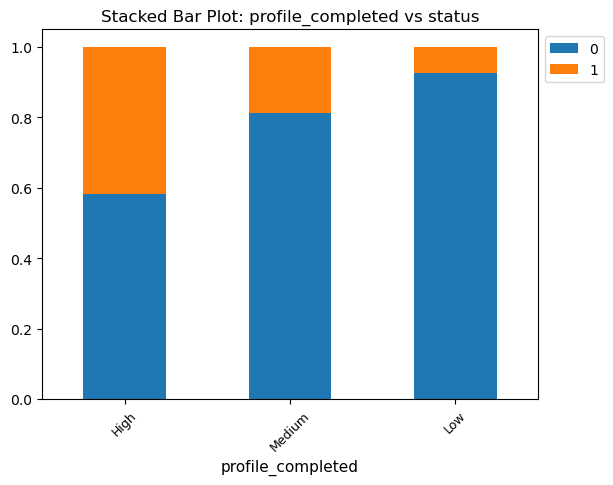

------------------------------------------------------------------------------------------------------------------------


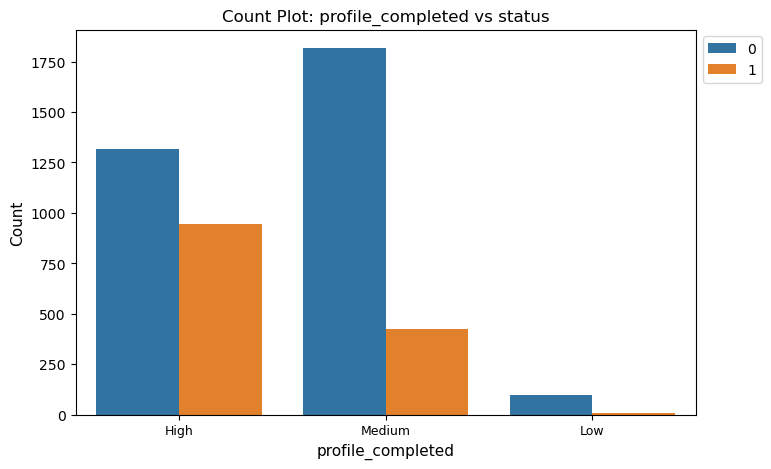

In [53]:
# Relationship between Completed profile and Status
plot_stacked_and_count(data, 'profile_completed', 'status')

**Observations:**
* A high level of completed profile, meaning that 75-100% of the profile is completed, have a higher conversion to paid customer rate (946 out of 2264 leads which represent ~42%).
* Whereas, the other to levels completion (medium and low) have comparatively low conversion rate.
* Only 8 leads out of the 107 who have completed less than 50% of their profile have convert to paid custumers, which ~7%.
* It seems that a high level of profile completion indicate the lead's intent to persue the program or not, which then results in the higher conversion rate.

##### **K. Completed Profile by the leads who had their 1st intereaction on the website vs Status**

status                0     1   All
profile_completed                  
All                1383  1159  2542
High                419   831  1250
Medium              909   320  1229
Low                  55     8    63
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

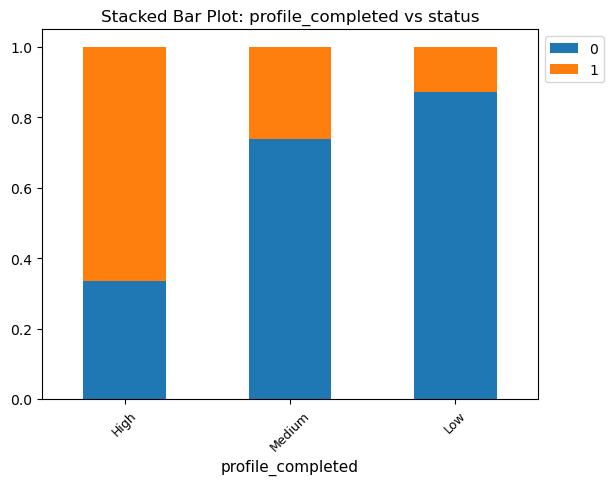

------------------------------------------------------------------------------------------------------------------------


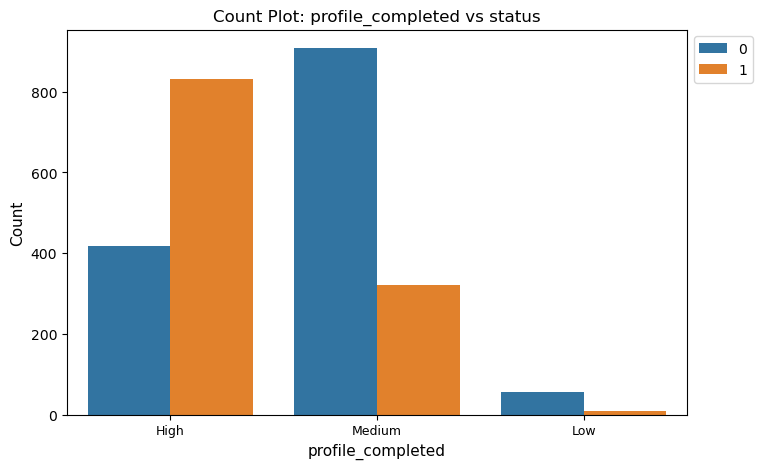

In [54]:
#Filter the output "Website" from first_interaction variable
first_interaction_Website = data[data['first_interaction'] == 'Website']

# Relationship between Completed profile by lead who had their 1st interaction on website and their status
plot_stacked_and_count(first_interaction_Website, 'profile_completed', 'status')

**Observations:**
* The 8 leads who had completed less than 50% of their profile and have converted had their 1st interaction on the website.
* Comparing the high and medium profile completed on both the website and mobile app, they are smiliar. 
    * For a high completion profile, 1250 out of 2264 leads (~55.2%) had their 1st interaction of the website.
    * For a medium completion profile, 1126 out of 2241 leads (~50.2%) had their 1st interaction of the website.
* High completion of profile (75 to 100%):
    * 831 out of the 1250 leads who had their 1st interaction on the website have converted to paid customers, which represent ~66.5%.
    * When including every lead who had a high completion of their profile and have converted, 831 of them out of the 946 had their 1st interaction on the website, which represent ~87.8%.
* Medium completion of profile (50 to 75%):
    * 320 out of the 1229 leads who had their 1st interaction on the website have converted to paid customers, which represent ~26%.
    * When including every lead who had a medium completion of their profile and have converted, 320 of them out of the 423 had their 1st interaction on the website, which represent ~75.7%.
    
- Having a profile with at least 50% of it completed is not influence by where the lead had it's 1st interaction. However, if the lead had their 1st interaction on the website, the chance of the lead converting is higher.
* Where the lead had it's 1st interaction seems to have no influence on them completing their profile or not.

##### **L. Last interaction vs Status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

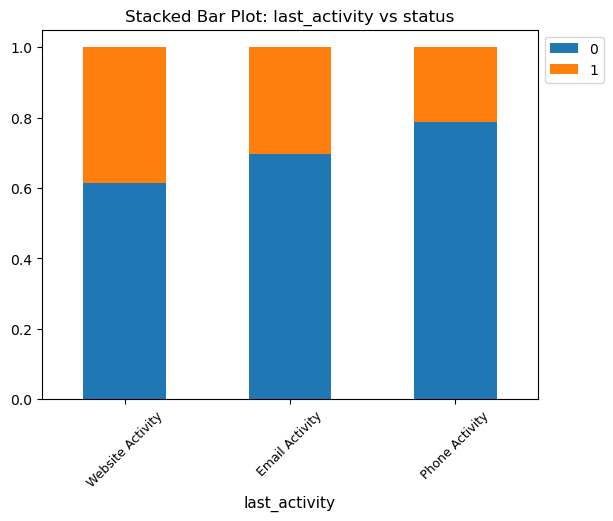

------------------------------------------------------------------------------------------------------------------------


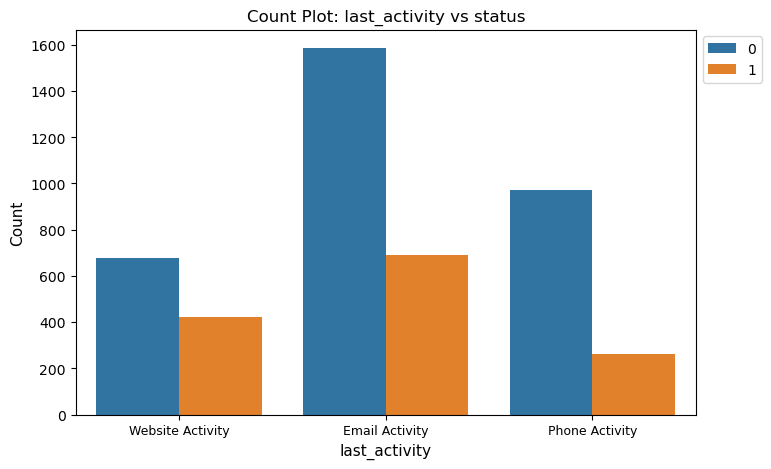

In [55]:
# Relationship between last interaction and Status
plot_stacked_and_count(data, 'last_activity', 'status')

**Observations:**
* If the lead's last interaction is through the website, there is a higher conversion tendency, eventhough there are majority of the leads had their last interaction through email.
    * 2278 leads had their last interaction through email but only 691 have converted, which represent ~30.3%.
    * 1100 leads had their last interaction through the website and 423 of them have converted, which represent ~38.5%.
* The lowest conversion rate is through phone activity. Only 263 leads out of the 1234 have converted, which represent ~21.3%.
* Even if emails seems to be prefered, the conversion rate to paid customers is not the highest. Prehaps, a follow up should be put in place.

##### **M. Ad seen in Newspaper vs Status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

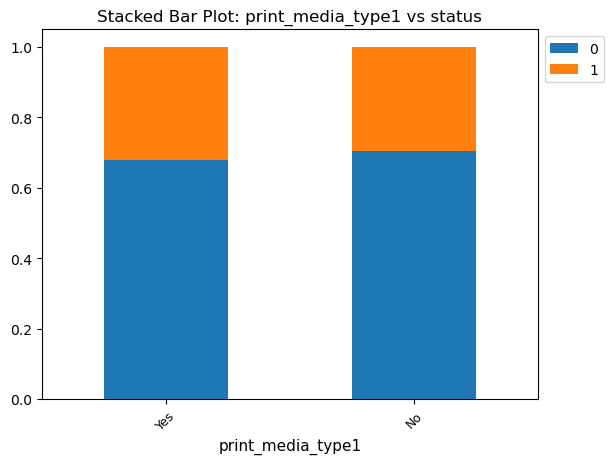

------------------------------------------------------------------------------------------------------------------------


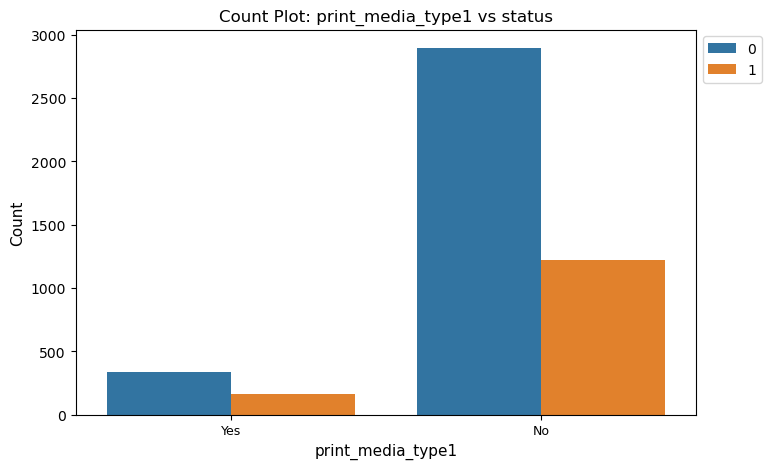

In [56]:
# Relationship between ad seen in newspaper (print_media_type1) and Status
plot_stacked_and_count(data, 'print_media_type1', 'status')

**Observations:**
* The number of leads that saw the ad in a newspaper is very low (~10.7% which is only 497 leads out of 4612).
* ~32% of leads that saw the ad in a newspaper have converted to paid customers, which represent 159 leads.
* ~29.6% of leads that have not seen the ad have converted to paid customers, which represent 1218 leads.
* The number of leads that convert to paid customers after seeing the ad is slightly higher, only by ~2.6%.

##### **N. Ad seen in Magazine vs Status**

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

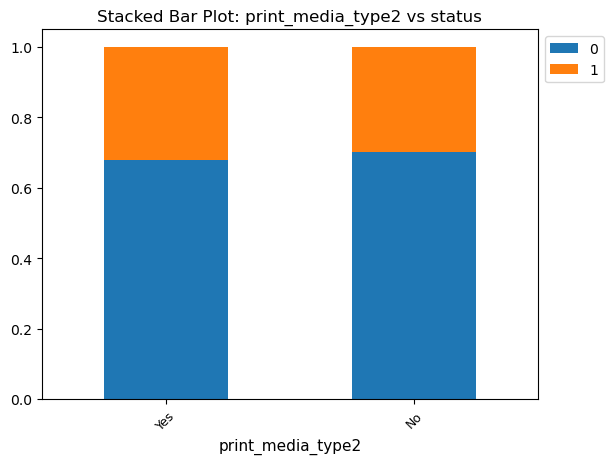

------------------------------------------------------------------------------------------------------------------------


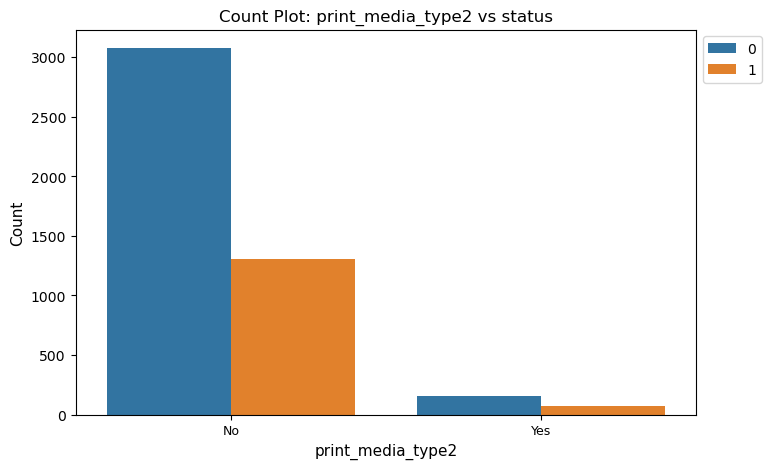

In [57]:
# Relationship between ad seen in magazine (print_media_type2) and Status
plot_stacked_and_count(data, 'print_media_type2', 'status')

**Observations:**
* The number of leads that saw the ad in a magazine is very low (~5% which is only 233 leads out of 4612).
* ~32.2% of leads that saw the ad in a magazine have converted to paid customers, which represent 75 leads.
* ~29.7% of leads that have not seen the ad have converted to paid customers, which represent 1302.
* The number of leads that convert to paid customers after seeing the ad is slightly higher, only by ~2.5%.

##### **O. Ad seen on Digital media vs Status**

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

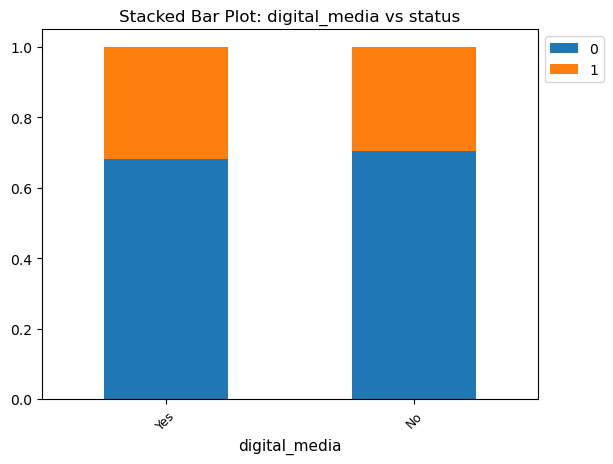

------------------------------------------------------------------------------------------------------------------------


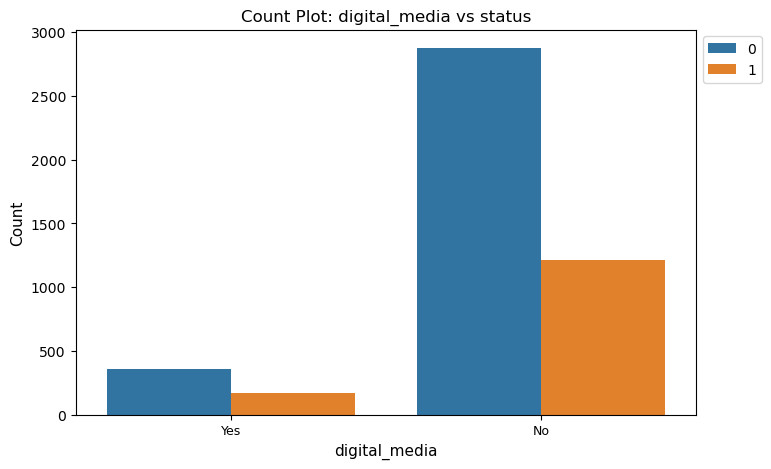

In [58]:
# Relationship between ad seen on Digital media and Status
plot_stacked_and_count(data, 'digital_media', 'status')

**Observations:**
* The number of leads that saw the ad on digital media is very low (~11.4% which is only 527 leads out of 4612).
* ~31.9% of leads that saw the ad in a magazine have converted to paid customers, which represent 168 leads.
* ~29.6% of leads that have not seen the ad have converted to paid customers, which represent 1209.
* The number of leads that convert to paid customers after seeing the ad is slightly higher, only by ~2.3%.

##### **P. Educational Channels  vs Status**

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

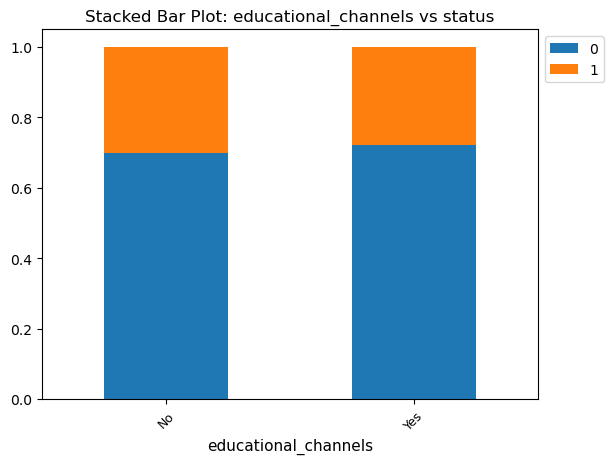

------------------------------------------------------------------------------------------------------------------------


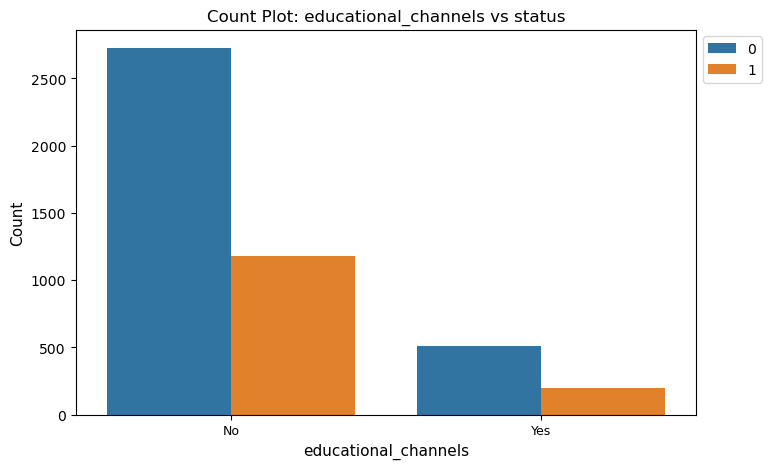

In [59]:
# Relationship between ad seen on Educational channels and Status
plot_stacked_and_count(data, 'educational_channels', 'status')

**Observations:**
* The number of leads that saw ExtraaLearn on Educational channels is very low (~15.3% which is 705 leads out of 4612).
* ~27.9% of leads that saw the ad in a magazine have converted to paid customers, which represent 197 leads.
* ~30.2% of leads that have not seen the ad have converted to paid customers, which represent 1180 leads.
* The number of leads that convert to paid customers after seeing ExtraaLearn on educational channels is slightly lower, only by ~2.3%.

##### **M. Referral  vs Status**

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

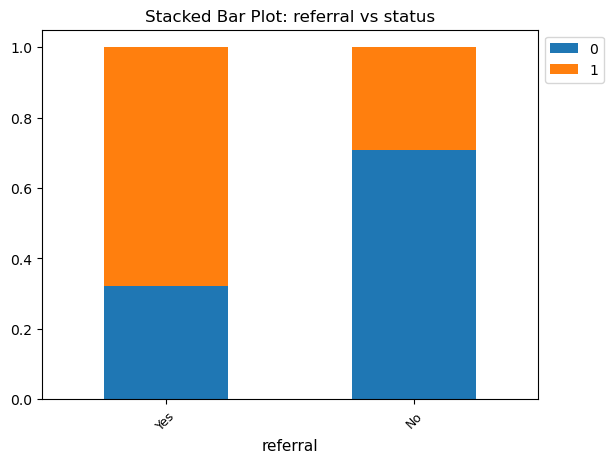

------------------------------------------------------------------------------------------------------------------------


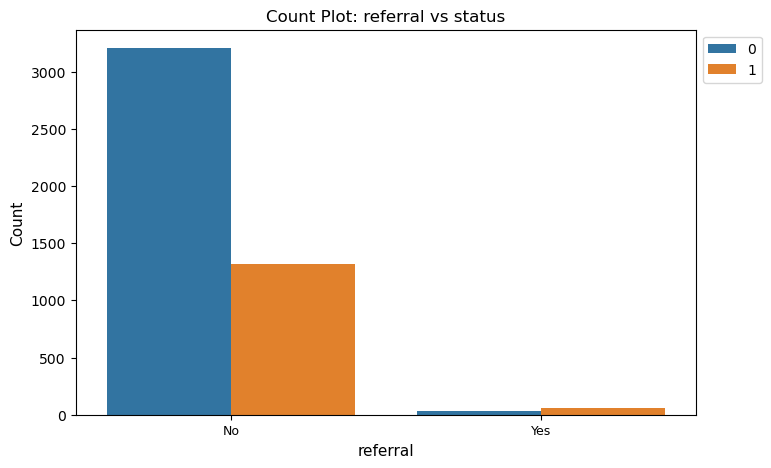

In [60]:
# Relationship between referral and Status
plot_stacked_and_count(data, 'referral', 'status')

**Observations:**
* The number of leads that were refered is very low (~2% which is 93 out of 4612 leads), however most of them became paid customers.
* ~67.7% of the referral become paid customers, which represent 63 leads.
* ~29.1% of leads that have not been refered have converted to paid customers, which represent 1314 leads.
* The number of leads that convert to paid customers after being refered is higher by almost 40%.

* The referral system is one the best way for ExraaLead to gain more leads. The company should look into investing into reference bonuses for existing customers each time they refere someone.

#### Correlation among numerical variable (multivariate)

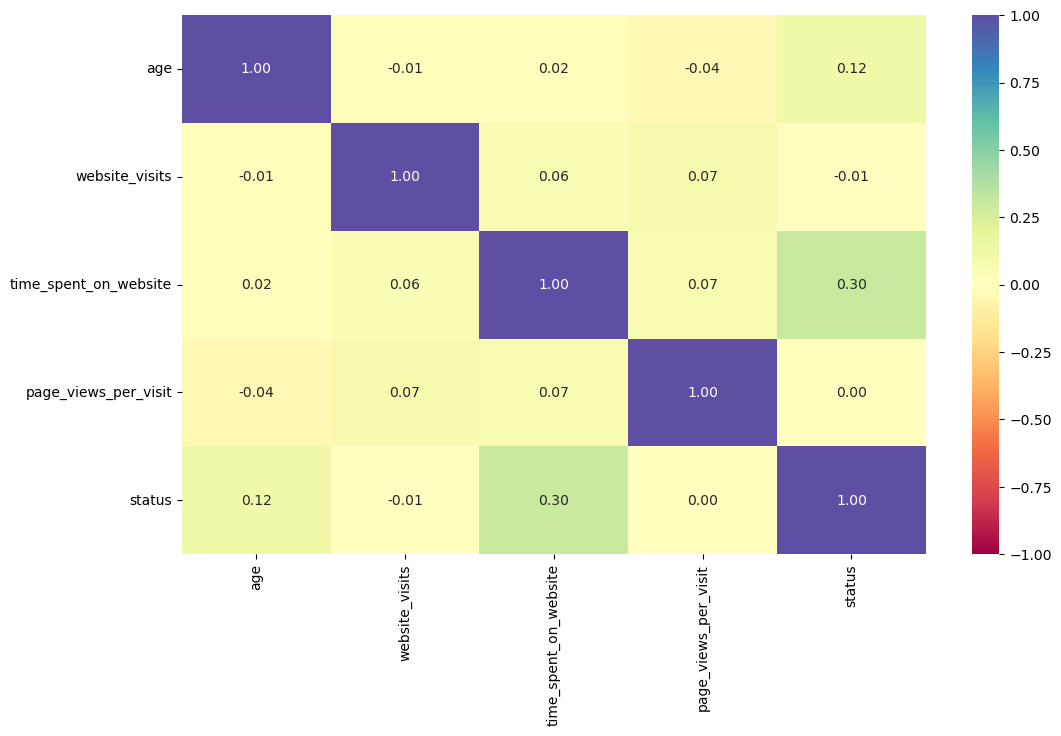

In [61]:
# Finding the correlation between various columns of the dataset

# Selecting only the numerical variable (.select_dtypes())
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Plotting a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
* The highest correlation, 0.30, is a weak positive one between the time spent on the website and the status. This correlation shows that there is more chances for a lead to be converting to a paid customer the longer they stay on the website.
* There are no other correlation shown.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Outlier Check

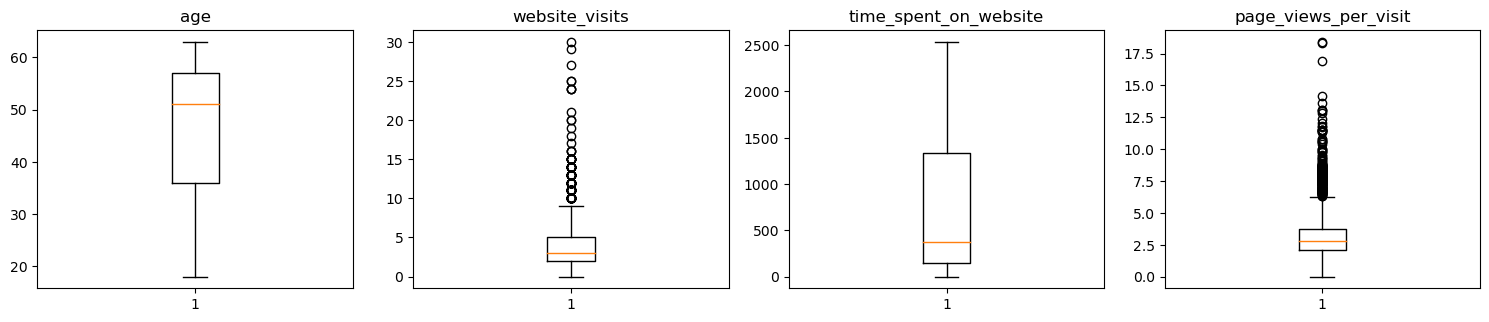

In [62]:
# outlier detection using boxplot

# Recall the list of all numerical columns created earlier (num_col)
num_col

# Dropping status as it is a variable with only two outcomes (0 or 1)
num_col.remove('status')

# Creating the boxplot
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* 2 out of the 4 boxplots have outliers.
* As website_visits and page_views_per_visit have many outliers, we are going to keep them for the decision tree model as they are important observations.

### Data Preparation for Modeling

In [63]:
# Separating the target variable (status) and other variables

# X a copy dataframe with the 'status' column removed 
X = data.drop(columns = 'status')

# Y is a series containing the "status" (column) -> the dependent targeted variable
Y = data['status']

In [64]:
# Creating dummy variables for X
# drop_first=True is used to avoid redundant variables
# pd.get_dummies function converts all categorical variables in X into binary 1(True) / 0(False)
X =pd.get_dummies(X, drop_first=True)

In [65]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.32000,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.07400,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.05700,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.91400,True,False,True,False,False,False,False,False,False,False,False,False


In [66]:
# Splitting the dataset into train and test datasets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [67]:
# Checking the shape of the train and test data
print('Shape of Training set: ', X_train.shape)
print('Shape of Test set: ', X_test.shape)
print("-" * 50)
print('Percentage of classes in Training set:')
print(y_train.value_counts(normalize=True))
print("-" * 50)
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set:  (3228, 16)
Shape of Test set:  (1384, 16)
--------------------------------------------------
Percentage of classes in Training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


### **Building Classification Models**

In [68]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [69]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state = 7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

## Model Performance evaluation and improvement

#### Checking model performance on training data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



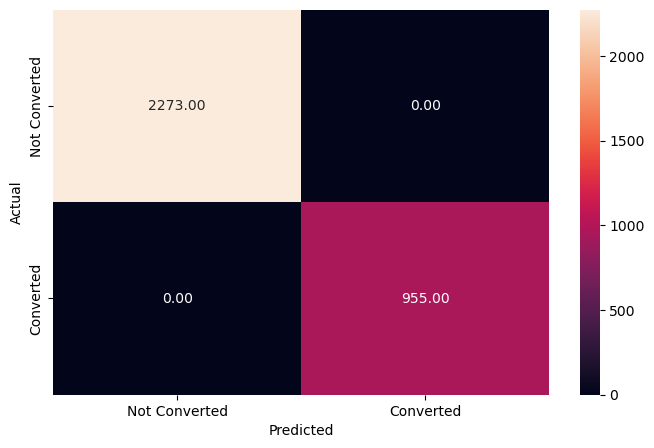

In [70]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations:**
* All 3228 observations have been classified, therefore there is no error on the training set.
* The recall = 1, which is the maximum. This also means there is a higher chance at minimizing False Negatives.
* The precision = 1, which is the maximum.
* A perfect recall and precision suggest that the model is mostly likely overfitting the training data. 

#### Checking test data performance to see if the model is overfitting

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



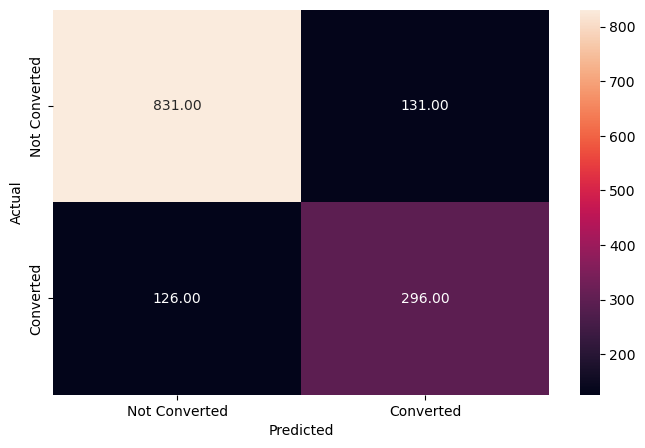

In [71]:
# Checking test data performance
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observations:**
* The Decision Tree works well on the training data but not as well on the test data as the recall is 0.78 in comparaison to 1 for the training data. This confirms that the Decision Tree is overfitting the training data.
* The precision on the test data suggests that there is 87% that the model will predict if the lead will not convert. 

**Can we improve the model with Hyperparameter Tuning?**

### **Decision Tree - Hyperparameter Tuning with GridSearchCV**

In [72]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

* The model was tuned and been fitted on the training data.

#### Checking model performance on tuned training dataset

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



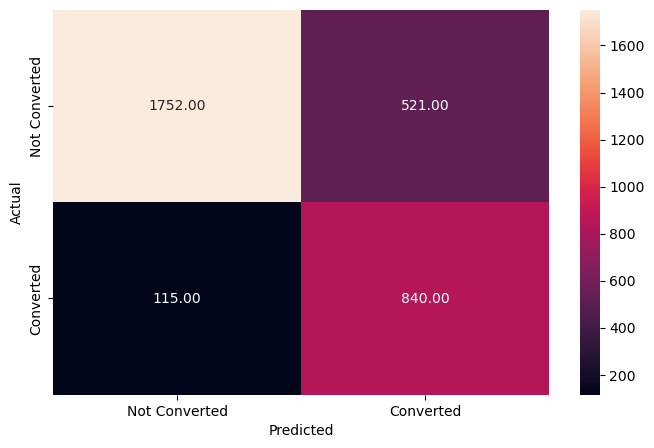

In [73]:
# Checking model performance on tuned training dataset
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:**
* All 3228 observations have been classified, therefore there is no error on the training set.
* This model is able to identify the majority of unconverted leads, which is 1752 observations.
* So, the perfermance decrease, which is expected as we are trying to not overfit the training data.

#### Checking model performance on tuned test dataset

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



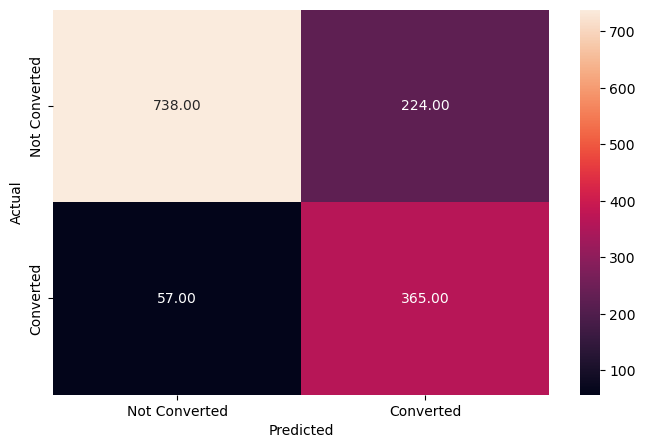

In [74]:
# Checking model performance on tuned test dataset
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:**
* The tuned test data model is very similiar to the tune training data model.
* The tuned model metrics have slightly imporved compared to the model with default parameters.
* The accuracy has decreased lightly by 1%.
* The precision has slighly decreased as well by 1%.
* The recall has increased by 4% to be at 82%, which is slightly above the 0.78% of precision.

**Time to visualize the tuned decision tree and examine the tree's decision rules**

### Visualizing the Decision Tree

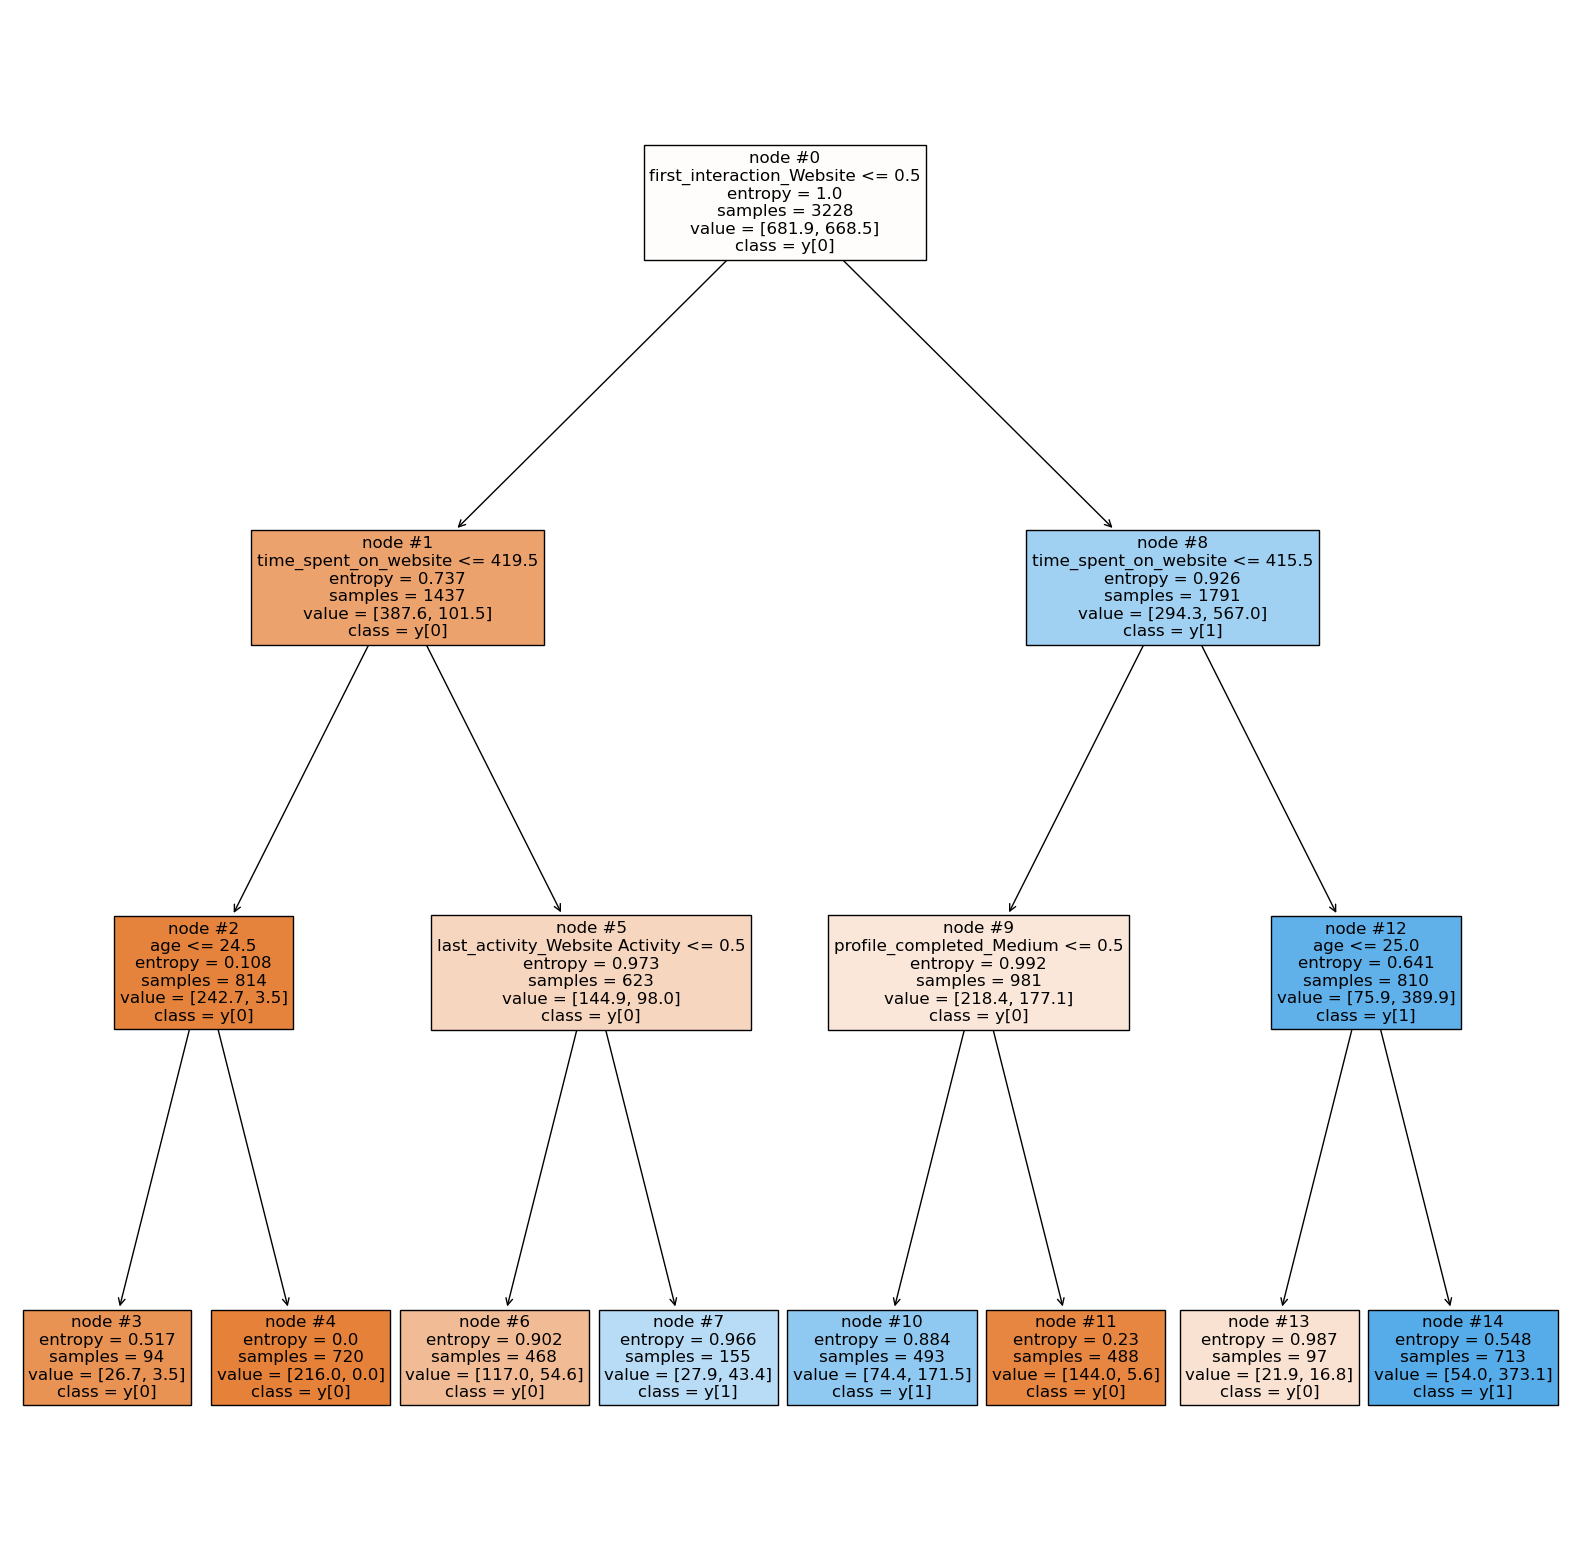

In [75]:
# Gathering all the columns for the X dataset into a list in a variable called features
features = list(X.columns)

# Plotting the decision tree
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = ['y[0]', 'y[1]'])
plt.show()

**Legend**
* Blue leaves (class y[1]) represent the converted leads
* Orange leaves (class y[0]) represent the non-converted leads
* The more the number of observations in a leaf, the darker its color gets

**Observations:**
- **Root Node:** first_interaction_website <= 0.5. This is the starting point of the decision tree, which means that the first interaction throught the website results in the highest information gain among all the features (seen in EDA). If the value is less than or equal to 0.5, the left branch is taken, and if it is greater than 0.5, the right branch is taken.
- **Internal Nodes:**
    - time_spent_on_website <= 419.5 (correlation observed in heatmap)
    - age <= 24.5
    - last_activity_Website Acitivity <= 0.5
    - time_spent_on_website <= 415.5
    - profile_completed_Medium <= 0.5
    - age <= 25.0
    
These are the intermediate nodes of the tree. Each node represents a decision based on a particular feature and a threshold value. Depending on the value of the feature, the tree follows the appropriate branch until it reaches a leaf node.

- **Leaf nodes** are the nodes in the tree that do not have any child nodes. In this tree, the leaf nodes correspond to the final decision of the tree. For example, the first leaf node in the tree is reached when the value of "first_interaction_website" is less than or equal to 0.5, "time_spent_on_website" is less than or equal to 419.5, and "age" is less than or equal to 24.5.

**Interpretation and Conclusions:**

- The decision tree starts with a split on the first_interaction_website feature. If the lead did not have its first interaction on the website, the tree proceeds to consider the lead's time spent on the website and their last activity. 
    - If the lead has spent less than 419.5 seconds on the website and despite its age, the tree reaches a leaf node and it is predicted that the lead is not going to convert to a paid customer.
    - If the lead has spent more than 419.5 seconds on the website and its last activity was on the website, then it is predicted that the lead is going to convert to a paid customer. 
- If the lead had its first interaction on the website, the tree proceeds to consider the time spent on the website, the profile completation, and the age. 
    - If the lead has spend less than 415.5 seconds on the website and has completed more than 50% of their profile, the tree reaches a leaf node and it is predicted that the lead is going to convert to a paid customer.
    - If the lead has spend more than 415.5 seconds on the website and is older than 25, the tree reaches a leaf node and it is  predicted that the lead is going to convert to a paid customer.


- Leads who have their first interaction on the website have a higher conversion rate.
- Leads who spend more time on the website, they are most likely to convert to paid customers.
- Leads who are above 25 years olds are more likely to convert to paid customers.
- Leads who have completed more than 50% of their profile are more likely to convert to paid customers.

**Look at the feature importance of the tuned decision tree model**

In [76]:
# Importance of features in the tree building
print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


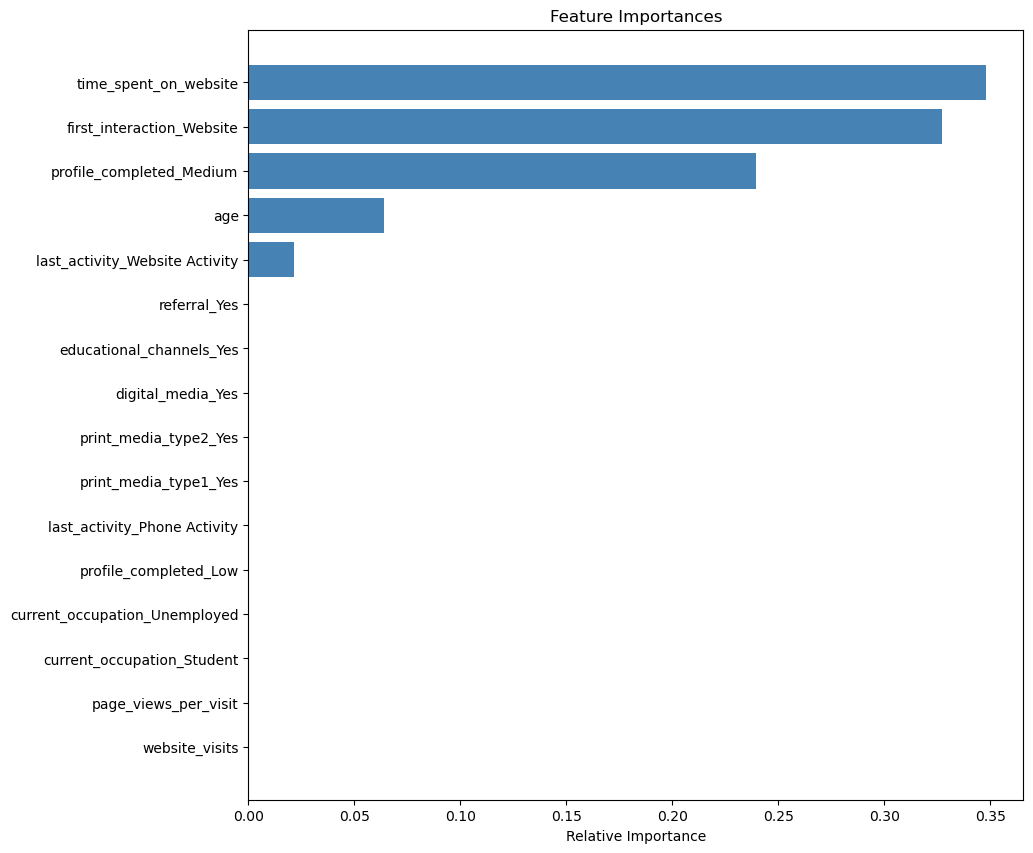

In [77]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'steelblue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
* Most important features are:
    * Time_spent_on_website: ~34.8%
    * First_interaction_Website: ~32.7%
* The 3 next features that are important to consider are:
    * Profile_completed_medium: ~23.9%
    * Age: ~6.4%
    * Last_activity_Website activity: ~2.2%
* The rest of the variables have no impact on this model when it comes to predicting if a lead will be converted to a paid customer or not.

## Building a Random Forest model

In [78]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=7,criterion="entropy")
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

## Model Performance evaluation and improvement

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



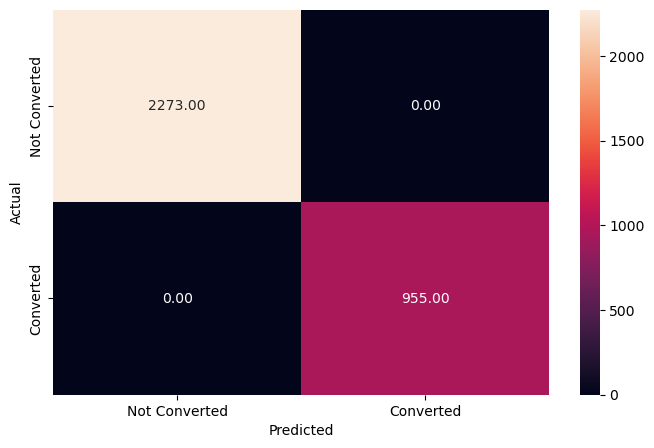

In [79]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations:**
* All 3228 observations have been classified, therefore there is no error on the training set.
* The recall = 1, which is the maximum. This also means there is a higher chance at minimizing False Negatives.
* The precision = 1, which is the maximum.
* A perfect recall and precision suggest that the model is mostly likely overfitting the training data, like for the decision tree. 

#### Checking test data performance to see if the model is overfitting

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



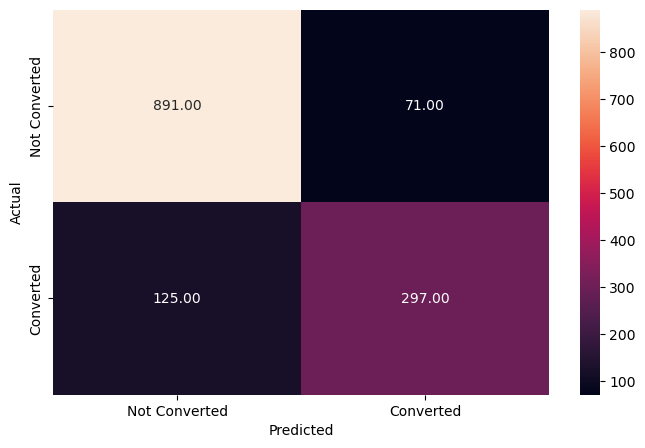

In [80]:
# Checking test data performance
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
* The Random Forest works well on the training data but not as well on the test data as the recall is 0.81 in comparaison to 1 for the training data.
* The recall is lower than the f1-score by 2%, which is not our aim.
* The precision on the test data suggests that there is 16% chance that the model will predict that a lead is going to leave even though they would not.
* The model is also overfitting. This seems normal as we are working on an unrestrained random forest. 

**Can we improve the model with Hyperparameter Tuning?**

### **Frandom Forest Classifier - Hyperparameter Tuning**
For this data, we noticed from hyperparameter tuning for decision tress that 'entropy' is a better slipping criterion. Therefore, the 'criterion' hyperparameter will not be tuned.

In [81]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

In [82]:
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

In [83]:
# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

In [84]:
grid_obj = grid_obj.fit(X_train, y_train)

In [85]:
# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

In [86]:
#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

* The model was tuned and been fitted on the training data.

#### Checking model performance on tuned training data

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



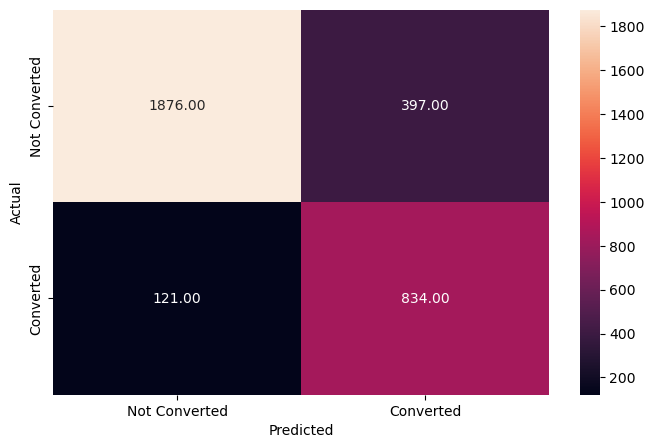

In [87]:
# Checking model performance on the tuned training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observations:**
* All 3228 observations have been classified, therefore there is no error on the training set.
* This model is able to identify the majority of unconverted leads, which is 1876 observations.
* So, the perfermance decrease, which is expected as we are trying to not overfit the training data.

#### Checking model performance on tuned test data

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



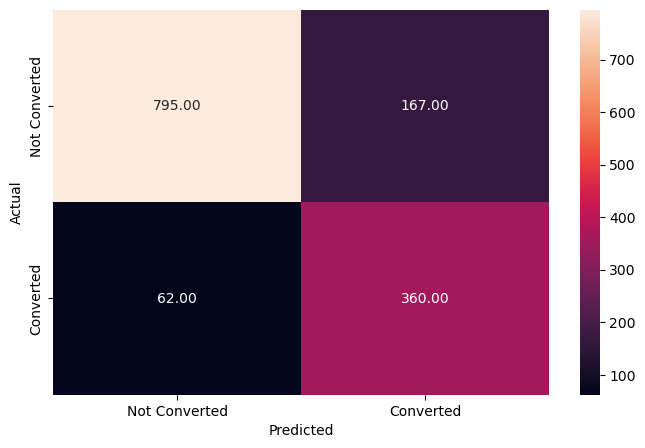

In [88]:
# Checking model performance on tuned test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:**
* The tuned test data model is very similiar to the tune training data model.
* The tuned model metrics have improved compared to the model with default parameters, which is logical has we reduced overfitting by tuning the model.
* The accuracy has decreased lightly by 3%.
* The precision has decreased as well by 13% for predicting leads not converting but has increased by 5% for the ones becoming paid customers.
* The recall has decreased as well by 10% for predicting leads not converting but has increased by 15% for the ones becoming paid customers.
* The macro average for the precision is 84%.
* However, these tuned ramdon forest models have a better potentiel to identify which leads will convert to paid customers.

Ensemble models does not allow an interpretation of the model. This means we cannot observe the decision rules for random forests the way we saw for decision trees.
Therefore, we will check thhe feature importance of the model.

**Look at the feature importance of the tuned random forest model**

In [89]:
# Importance of features in the tuned random forest
print (pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.30058
first_interaction_Website      0.28131
profile_completed_Medium       0.20011
age                            0.04800
last_activity_Phone Activity   0.03890
current_occupation_Unemployed  0.03712
current_occupation_Student     0.03542
last_activity_Website Activity 0.02991
page_views_per_visit           0.01549
website_visits                 0.00971
educational_channels_Yes       0.00160
profile_completed_Low          0.00142
print_media_type1_Yes          0.00036
digital_media_Yes              0.00007
print_media_type2_Yes          0.00000
referral_Yes                   0.00000


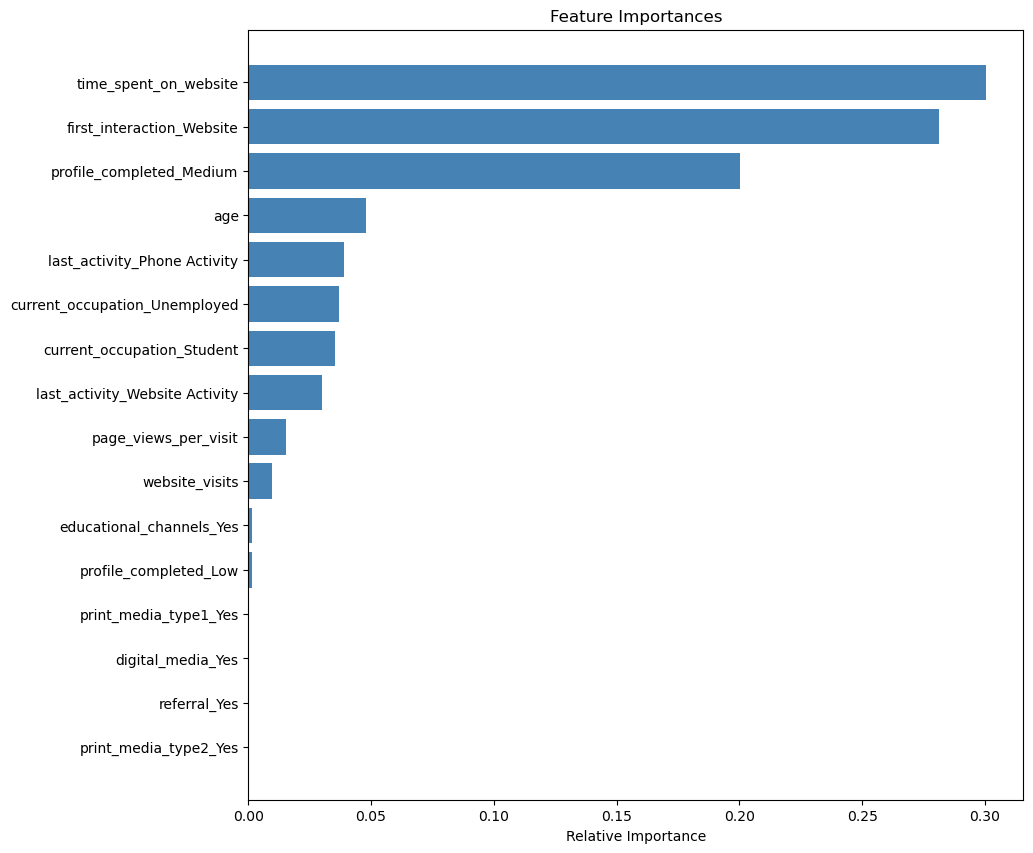

In [90]:
# Plotting the feature importance
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

# Gathering all the columns for the X dataset into a list in a variable called feature_names
feature_names = list(X.columns)

# Plot the graph
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'steelblue', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
* Most important features are:
    * Time_spent_on_website: ~30.1%
    * First_interaction_Website: ~28.1%
    * Profile_completed_medium: ~20.0%
* The next features that are important to consider are:
    * Age: ~4.8%
    * Last_activity_Phone Activity: ~3.9%
    * Current_occupation_Unemployed: ~3.7%
    * Current_occupation_Student: ~3.5%
    * Last_activity_Website Activity: ~3.0%
    * Page_views_per_visit: ~1.6%
    * Website_visits, educational_channels_Yes, and profile_completed_Low are each <1%
* The two last variables have no impact on this model when it comes to deciding if a lead will be converted to a paid customer or not.

- The first four important features are the same in both the decision tree and random forest. They follow the same order. They are the time spent on website, the first interaction on website, the profile completed medium, and the age.
- The top 4 features help distinguish if a lead will convert into a paid customer or not.
- Unlike the 11 variables in the tree decision, only 2 variable have 0 impact on the random forest model.
- The random forest model is giving importance to more features than the decision tree.

## Actionable Insights and Recommendations

### **Conclusions:**
* The EDA shows that only 30% of the leads convert to paying customers (which is 1382 leads out of 4612).
* Media Channels:
    * Most ad are seen by less then 15% of leads (which represent 692 leads out of 4612).
    * Ads in magazines are seen by roughly 5% of the leads, which represent 233 leads.
    * The media channels seems to not have any impact on the conversion rate.
    * However, despite the number of referral, this method has the highest conversion rate with ~67.7%, which represent 63 leads out of the 93 that have been refered.
* The current course seems to attract majotary professionals and unemployed leads with a median age of 54 years old.
* When the website is the first interaction with the lead, there is a higher chance to convert them to a paying customer.
* Where the lead had it's 1st interaction seems to have no influence on them completing their profile or not.
* When the lead's last interaction is on the website, there is a higher conversion rate.


- 2 modeling techniques are used: Decision Tree and Random Forest.
    - Recommanded model is the tuned random forest, as it has the highest recall score of 85% and macro average of 84% on its tuned test data.
    - The random forest also recongnize 12 features (some very small) as imporant instead of 5 features seen with the tree decision.
    - The Decision Tree and the tuned random forest can be used by ExtraaLearn to predict which leads are likely to be converted and plan their marketing strategies accordingly.
  
* In both models, the 4 most important features to take into consideration are:
    * Time spent on the website
    * First interaction been on the website
    * Profile completion, at least 50% (medium)
    * Age

### **Business Recommendations:**
* The time spent on the website in the most important feature, so it plays a key role in identifying whether a lead will convert or not. The more time a lead spent on the website, higher are the conversion rate.
    * ExtraaLearn should invest into developing and designing their website for a more pleasurable time.
    * The website should be easy to navigate through to not lose any lead.
    * All information should be easy to find and read, as the median age is 54. So, they should avoid small print.


- In addition to the time spent on the website, 55.1% of the leads have their first interaction on the website.
    - Almost haft of those leads (~45.6%) convert to paid customers.
    - This feature is also another reason for ExtraaLearn to invest into developing/designing their website.


* Given the volume of leads having their first interaction on the mobile app (44.9%), we can't neglect this tool and these leads as they are potiential paid customers.
    * Therefore, it would be wise for ExtraaLearn to also invest into the mobile app to become easier to navigate and to attract.


- Profile completion also play a role into the conversion rate.
    - ExtraaLearn should encourage the profile completion. A discount could be offered if the profile is completed before enrollement.
    - Researching how to make the lead complete the profile without blocking access to content could help the lead to complete the profile or to spend more time on the website.


* Age is also an important feature.
    * The older the lead is, more likely they will convert.
    * ExtraaLearn should invest into reaching the generation between 42 and 58 years old leads.


- Ads have very little impact on conversion rates.
    - Ads are very little seen.
    - ExtraaLearn should either stop investing into ads or should offer a discount through them to encourage readers to visit their website and consider becoming paying customers.
    - ExtraLearn could also find alternative platforms such as social media as those platforms are present in everyday life on the phone and people tend to go on them multiple time a day.
    - As most of the leads are professionals or unemployed, ExtraaLearn could also invest into ads going on websites from technologique companies and/or on unemployed website.


* Referral has a high conversion rate.
    * ExtraaLearn should invest into offering referral bonuses for existing customers each time they refere someone.